# Testing different Classification algorithms on 3D df

In [1]:
import pandas as pd
import numpy as np

In [2]:
!ls /home/andreag/Work/1.main_project/1.coacervsML/1.dataset_exploration/0.sliced_dataframe/

coacervate_starting_df_18032024_cleaned.csv  lys_asp_MWca_38.0_13.2_salt.png
coacervate_starting_df_18032024_lys_asp.csv  lys_asp_MWca_38.0_37.0.csv
lys_asp_MWca_16.525_37.0.csv		     lys_asp_MWca_38.0_37.0.png
lys_asp_MWca_16.525_37.0.png		     lys_asp_MWca_3.8_13.2.csv
lys_asp_MWca_38.0_13.2.csv		     lys_asp_MWca_3.8_13.2.png
lys_asp_MWca_38.0_13.2.png		     lys_asp_MWca_3.8_4.2.csv
lys_asp_MWca_38.0_13.2_salt.csv		     lys_asp_MWca_3.8_4.2.png


In [3]:
data_dir = '/home/andreag/Work/1.main_project/1.coacervsML/1.dataset_exploration/0.sliced_dataframe/'
dataset = 'lys_asp_MWca_16.525_37.0.csv'

df = pd.read_csv(data_dir+dataset).drop(labels='Unnamed: 0', axis=1)

In [4]:
try:
    f0, f1, f2, ft = ['Conc_Anion_C(C(C(=O)O)N)C(=O)O', 'Conc_Cation_C(CCN)CC(C(=O)O)N', 'Conc_NaCl', 'Phase']
    X, X0, X1, X2, y = df[[f0,f1,f2]], df[f0], df[f1], df[f2], df[ft]
    print(f'3 variables {f0,f1,f2}')
except:
    f0, f1, ft = ['Conc_Anion_C(C(C(=O)O)N)C(=O)O', 'Conc_Cation_C(CCN)CC(C(=O)O)N', 'Phase']
    X, X0, X1, y = df[[f0,f1]], df[f0], df[f1], df[ft]
    print(f'2 variables {f0,f1}')

3 variables ('Conc_Anion_C(C(C(=O)O)N)C(=O)O', 'Conc_Cation_C(CCN)CC(C(=O)O)N', 'Conc_NaCl')


In [5]:
X.info(), y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Conc_Anion_C(C(C(=O)O)N)C(=O)O  4383 non-null   float64
 1   Conc_Cation_C(CCN)CC(C(=O)O)N   4383 non-null   float64
 2   Conc_NaCl                       4383 non-null   float64
dtypes: float64(3)
memory usage: 102.9 KB
<class 'pandas.core.series.Series'>
RangeIndex: 4383 entries, 0 to 4382
Series name: Phase
Non-Null Count  Dtype
--------------  -----
4383 non-null   int64
dtypes: int64(1)
memory usage: 34.4 KB


(None, None)

In [6]:
# Unkown phases are labels as -1

start_idxs = [i for i,p in enumerate(y) if p != -1]
start_idxs

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46]

In [7]:
import matplotlib.pyplot as plt
from utils.beauty import get_alphas, get_axes

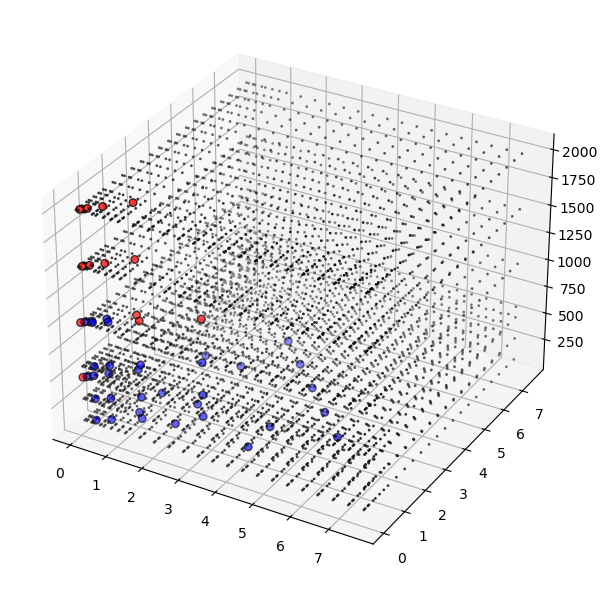

In [8]:
# import matplotlib.pyplot as plt
from phdtools.plots import get_axes

xl, yl, zl = 'Conc_Anion_C(C(C(=O)O)N)C(=O)O', 'Conc_Cation_C(CCN)CC(C(=O)O)N', 'Conc_NaCl'
colorElements = ['r', 'b', 'g', 'y', '.9']
sizeElemens = [30, 30, 30, 30, 1]
alphaElements = [1., 1., 1., 1., .3]

fig = plt.figure(figsize = (6,6))
ax = plt.axes(projection='3d')
ax.grid()
ax.scatter(
    X0, X1, X2,
    c=[colorElements[c] for c in y],
    s=[sizeElemens[s] for s in y],
    # alpha=[alphaElements[a] for a in exp_df['Phase']],
    edgecolor='0.',
)

fig.tight_layout()

In [9]:
forigami = f2
valorigami = np.unique(X[forigami].values)

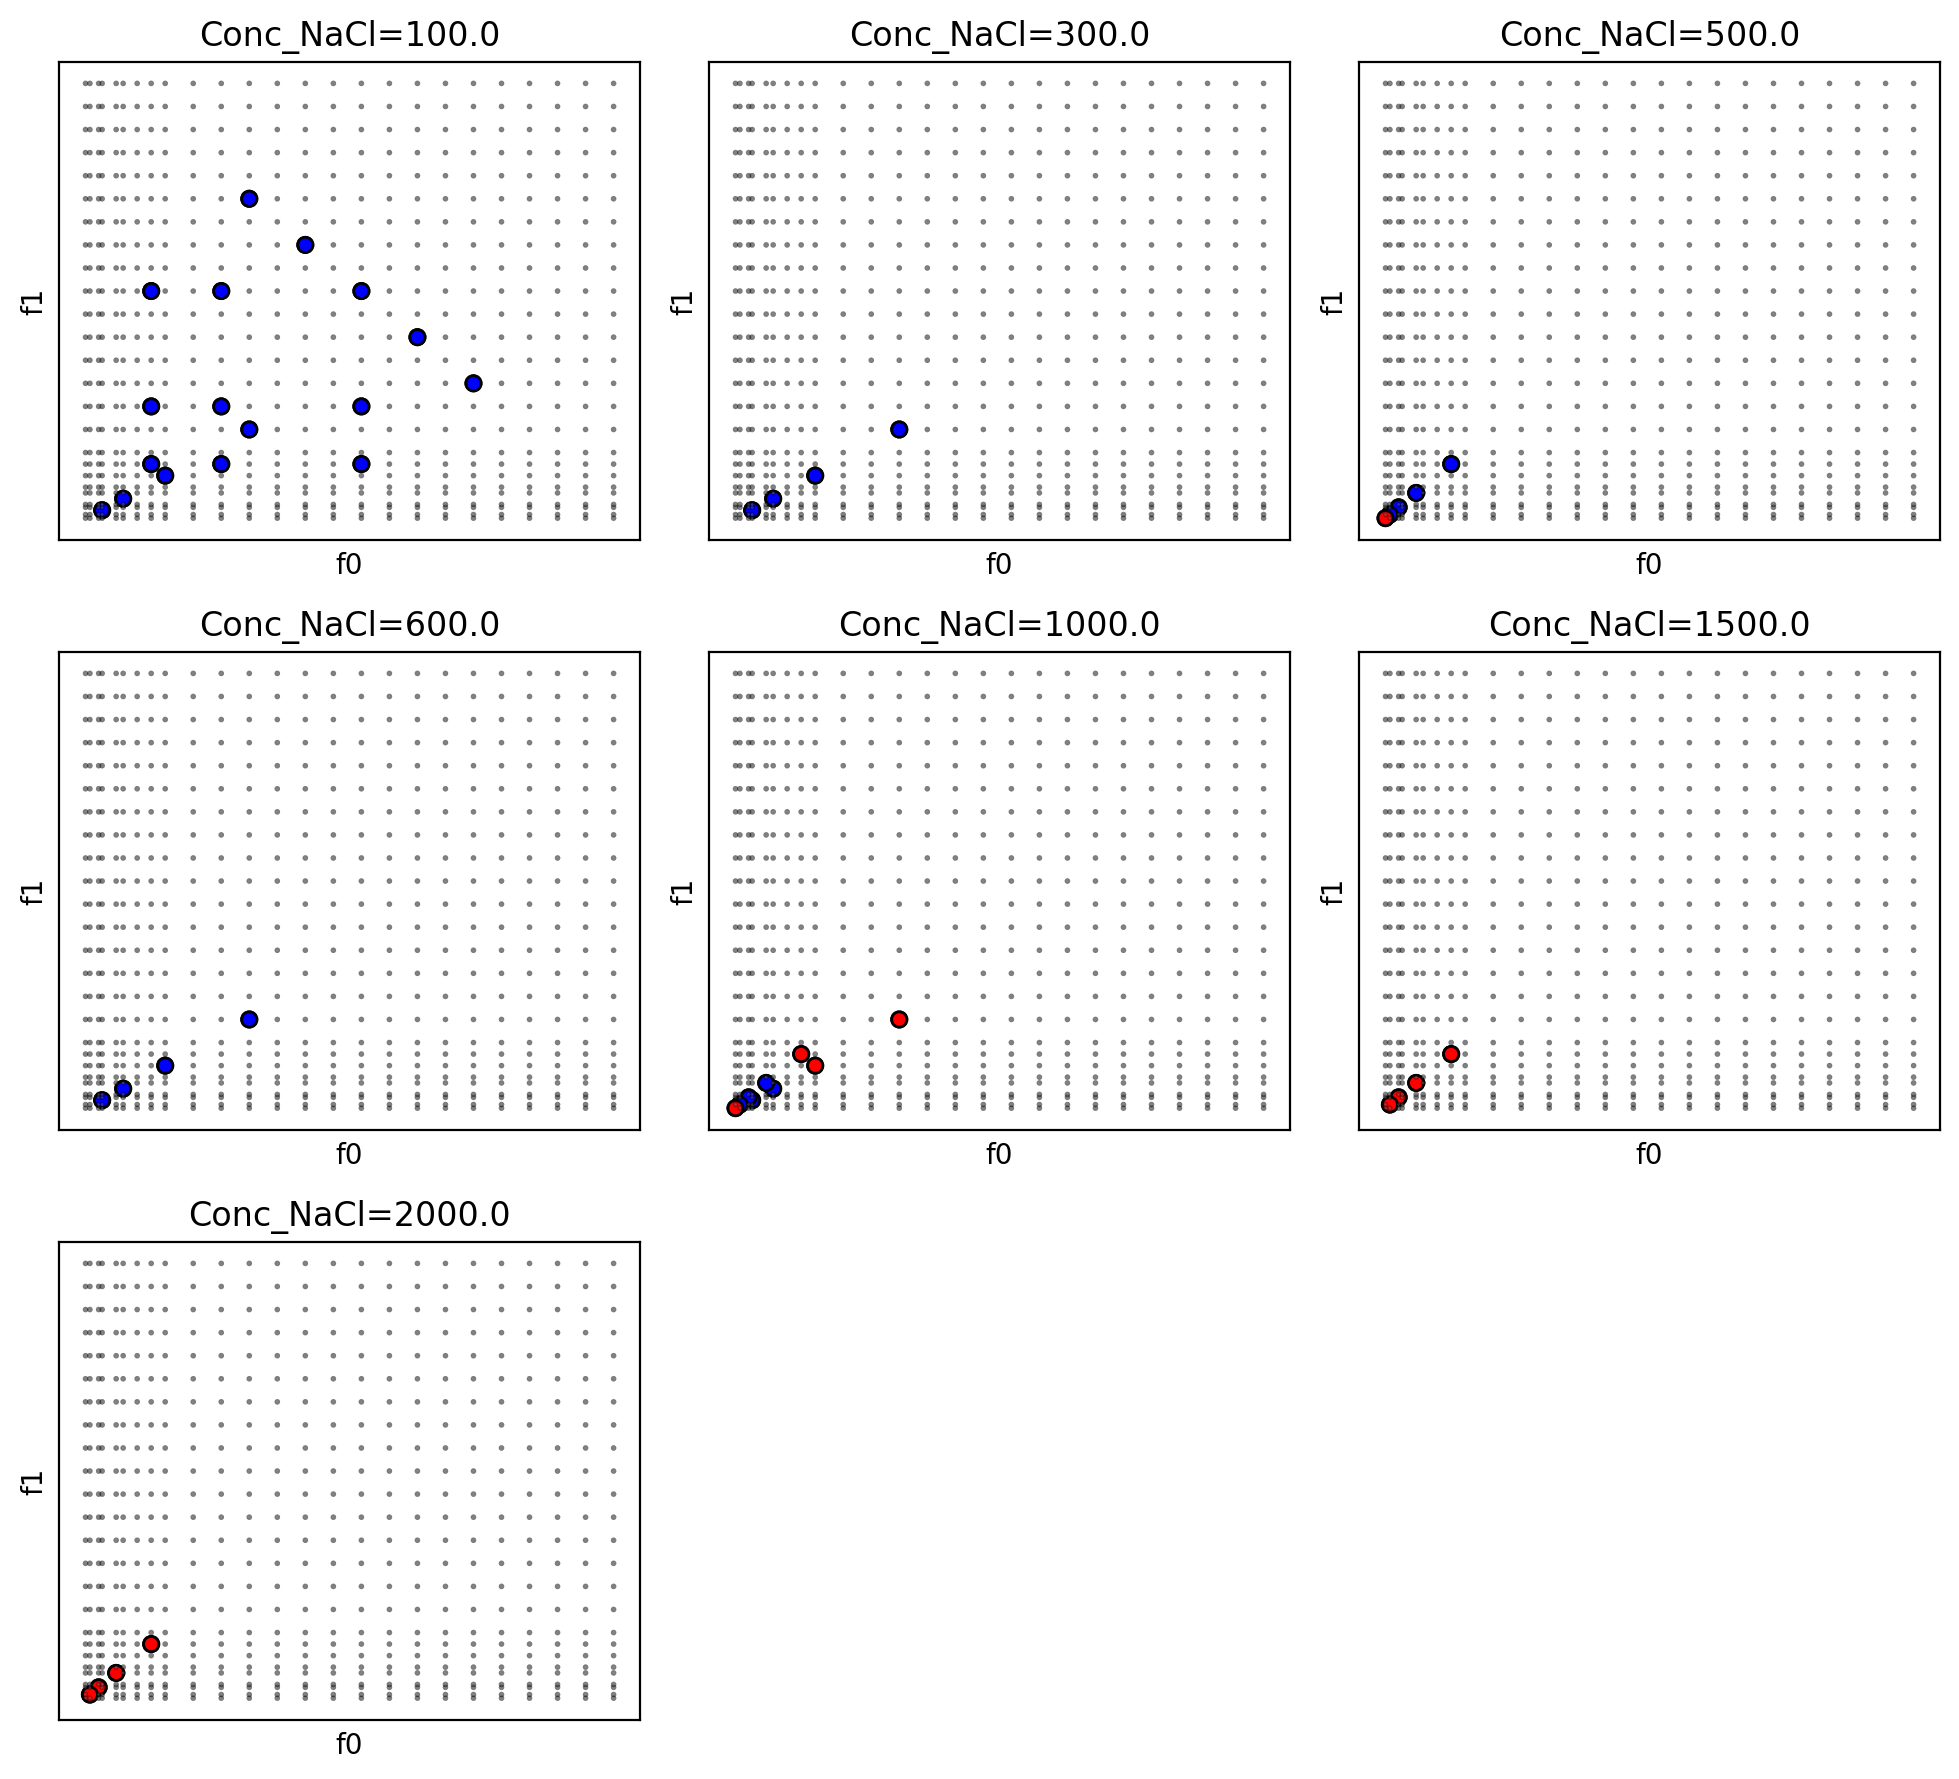

In [10]:
fig, ax = get_axes(len(valorigami),3)

colorElements = ['r', 'b', 'g', 'y', '.9']
sizeElemens = [30, 30, 30, 30, 1]
alphaElements = [1., 1., 1., 1., .3]

for c in range(2):

    for i,val in enumerate(valorigami):

        val_mask = [j for j,v in enumerate(X[forigami].values) if v == val]

        ax[i].scatter(X0.iloc[val_mask], X1.iloc[val_mask], 
                    c=[colorElements[c] for c in y[val_mask]], 
                    s=[sizeElemens[s] for s in y[val_mask]],
                    alpha=[alphaElements[a] for a in y[val_mask]],
                    edgecolor='0.')

        ax[i].set_title(f'{forigami}={val}')

        ax[i].set_xlabel('f0')
        ax[i].set_ylabel('f1')
        ax[i].set_xticks(())
        ax[i].set_yticks(())

fig.tight_layout()

## Universal parameters

In [11]:
from acquisition import DecisionFunction

acqui_mode = 'exploration'
ac_func = DecisionFunction(mode=acqui_mode)

In [12]:
sampling_mode = 'FPS'
n_batch = 10

In [13]:
from learning import active_learning_cycle

In [16]:
import scipy
from sklearn.preprocessing import MinMaxScaler

## GPC

In [14]:
from classification import ClassifierModel
from classification import RBF

# define the classifier model
clf_model = 'GaussianProcessClassifier'

# specific parameters
clf_dict = dict(
    kernel=1.0 * RBF(1.0), 
    random_state=73
)

al_clf = ClassifierModel(model=clf_model, **clf_dict)

In [15]:
new_idxs_fps = active_learning_cycle(
    feature_space=(X, y),               # starting training feature space (points, classes)
    idxs=start_idxs,                    # starting indexes
    new_batch=n_batch,                  # number of points in outcome
    clfModel=al_clf,                    # initialised classifier
    acquisitionFunc=ac_func,            # aquisition mode
    screeningSelection=sampling_mode    # sampling methods for the points acquisition
    )
new_idxs_fps

Found 618 points that shares the same acquisition criteria.
Selecting 10 by 'FPS' sampling.


[1017, 4212, 4380, 2118, 2460, 3261, 210, 98, 4331, 3212]

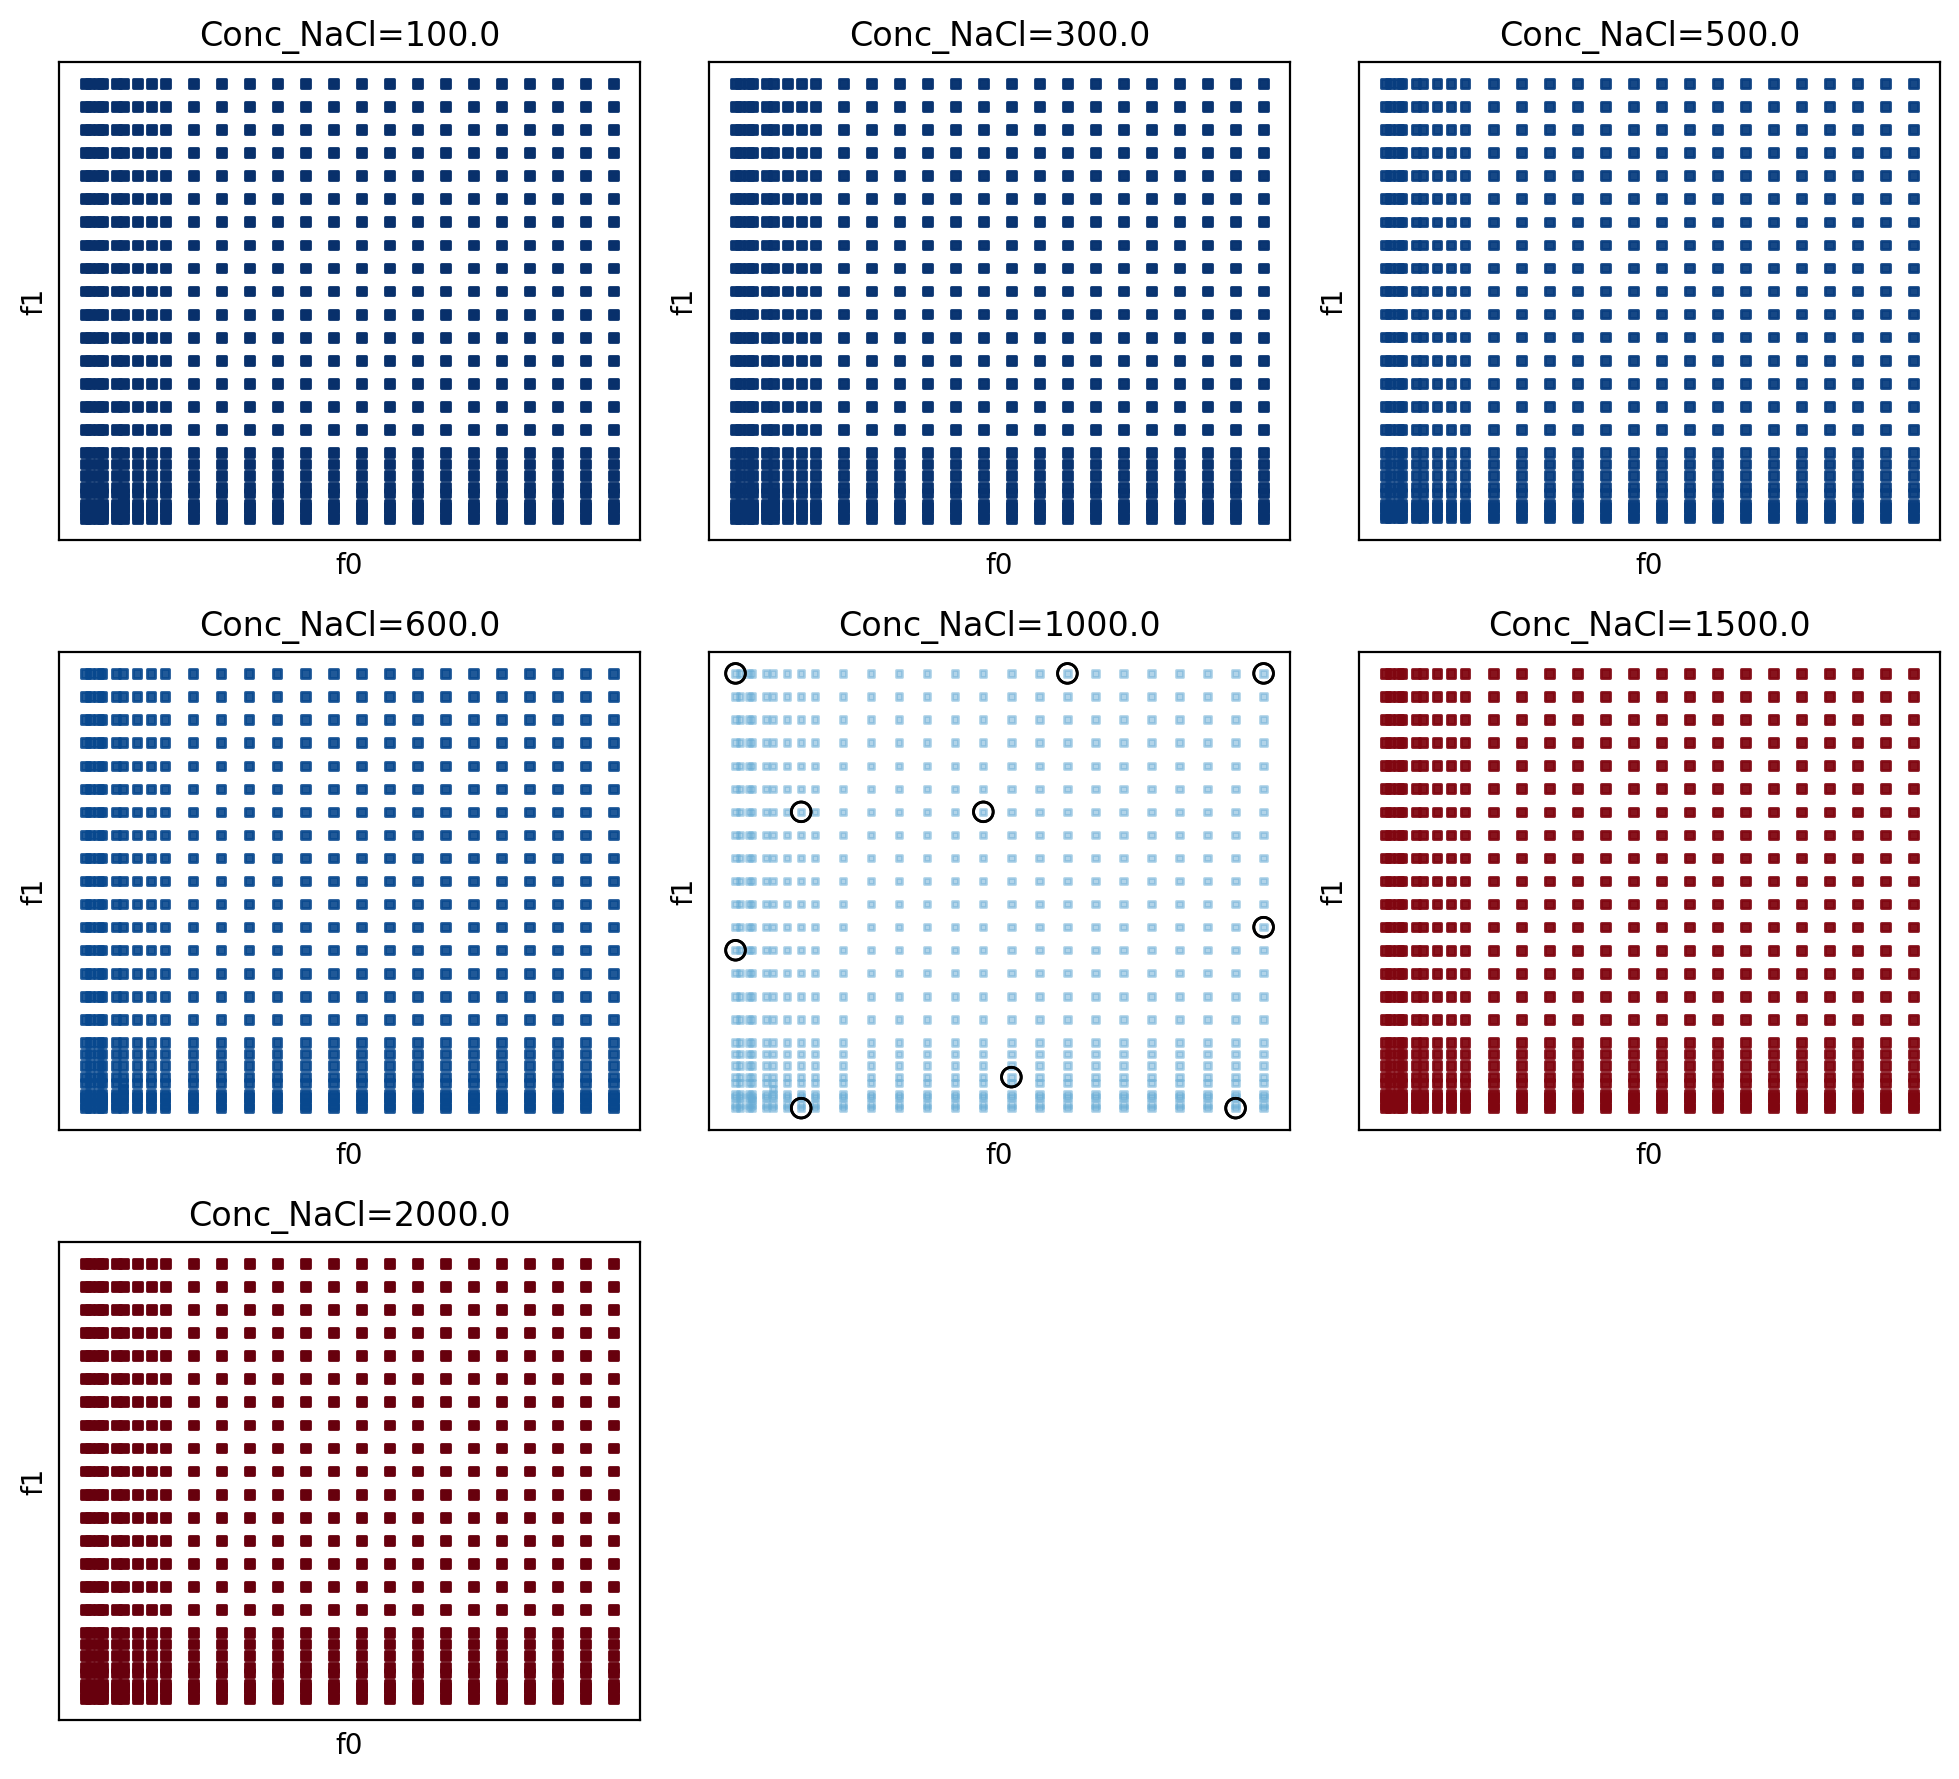

In [17]:
cmap_list = ['Reds', 'Blues', 'Greens']
_Z = al_clf.predict_proba(X=X)
Z = MinMaxScaler().fit_transform(_Z)
H = scipy.stats.entropy(pk=Z, axis=1)

fig, ax = get_axes(len(valorigami),3)

for c in range(2):
    alphas = get_alphas(Z=Z[:, c], scale=True)

    for i,val in enumerate(valorigami):

        val_mask = [j for j,v in enumerate(X[forigami].values) if v == val]
        # sizes = (Z[val_mask, c] * (H[val_mask]  - max(H)) * -1) + 0.005

        ax[i].scatter(X0.iloc[val_mask], X1.iloc[val_mask], 
                    c=Z[val_mask, c], cmap=cmap_list[c],
                    vmin=0., vmax=1.,
                    alpha=alphas[val_mask],
                    s=Z[val_mask, c]*10, 
                    marker='s')
            
        choosen_pts = [p for p in val_mask if p in new_idxs_fps]
            
        if len(choosen_pts) > 0:
            ax[i].scatter(X0.iloc[choosen_pts], X1.iloc[choosen_pts], 
                        edgecolor='0.', facecolor='none', 
                        s=50, zorder=3)
                

        ax[i].set_title(f'{forigami}={val}')

        ax[i].set_xlabel('f0')
        ax[i].set_ylabel('f1')
        ax[i].set_xticks(())
        ax[i].set_yticks(())

fig.tight_layout()

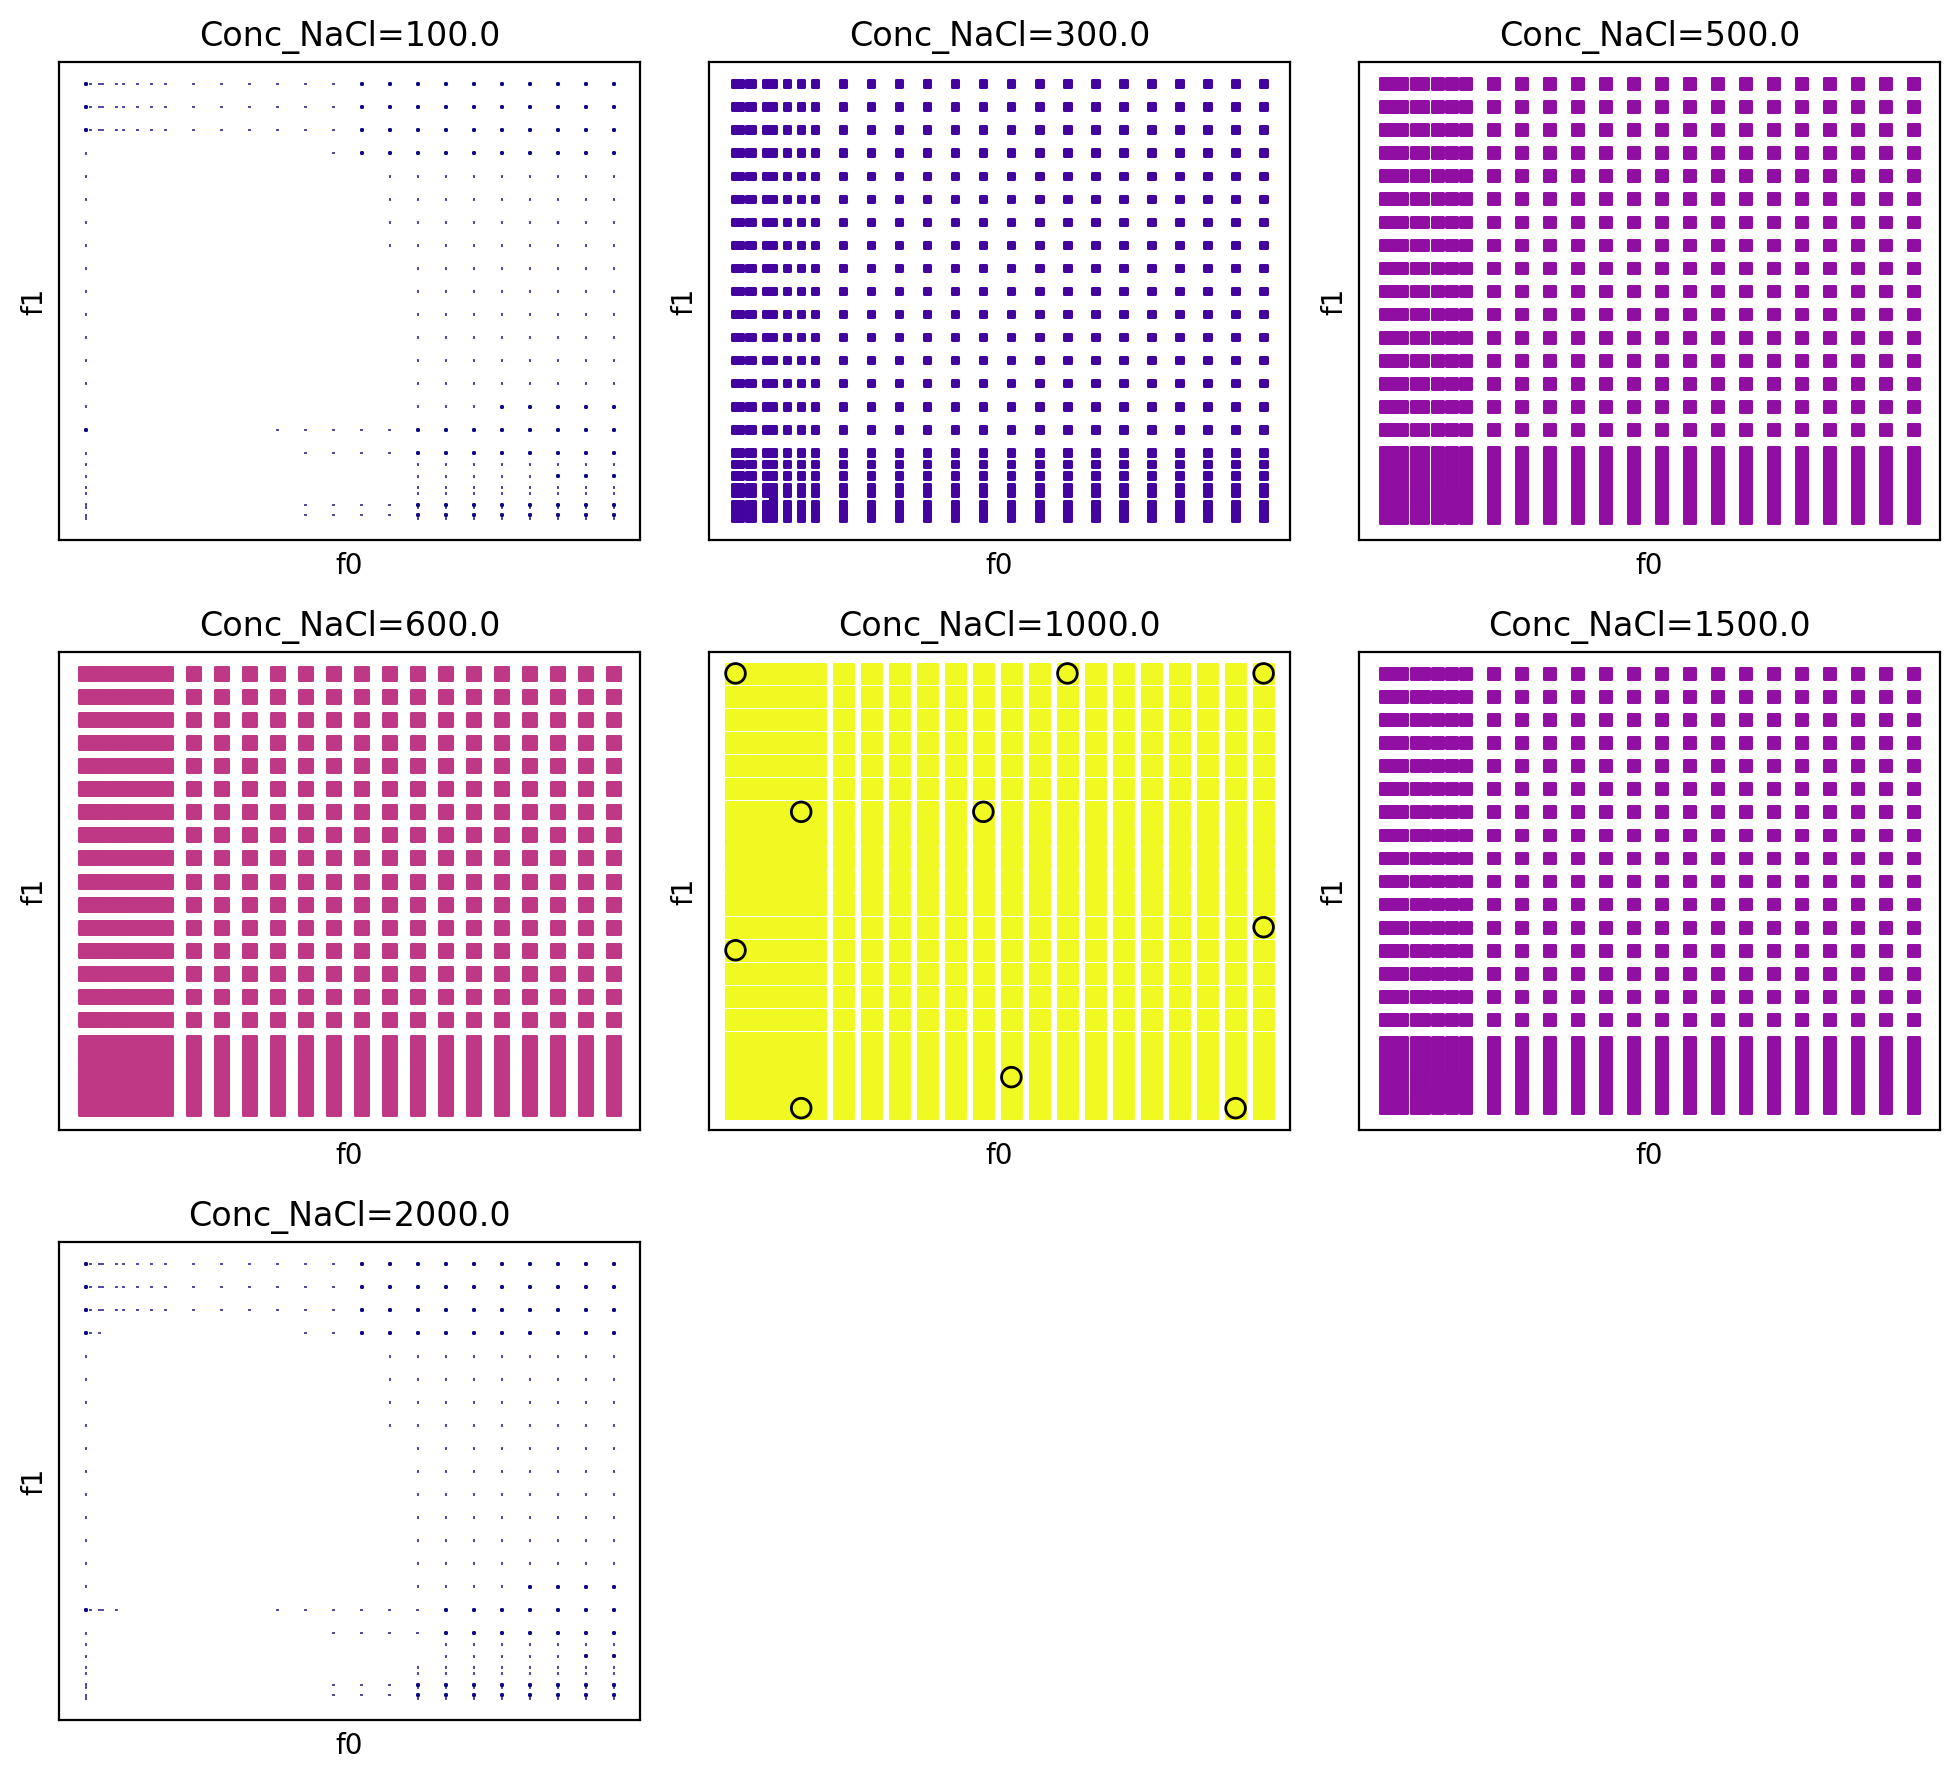

In [18]:
fig, ax = get_axes(len(valorigami),3)

for i,val in enumerate(valorigami):

    val_mask = [i for i,v in enumerate(X[forigami].values) if v == val]
    choosen_pts = [p for p in val_mask if p in new_idxs_fps]
        
    if len(choosen_pts) > 0:
        ax[i].scatter(X0.iloc[choosen_pts], X1.iloc[choosen_pts], 
                    edgecolor='0.', facecolor='none', 
                    s=50, zorder=3)

    for c in range(2):
        # alphas = get_alphas(Z=Z[val_mask, c], scale=True)
        # sizes = (Z[val_mask, c] * (H[val_mask]  - max(H)) * -1) + 0.005

        ax[i].scatter(X0.iloc[val_mask], X1.iloc[val_mask], 
                    c=H[val_mask], cmap='plasma',
                    # alpha=alphas,
                    vmin=min(H), vmax=max(H),
                    s=H[val_mask]*70, #Z[val_mask, c]*15, 
                    marker='s')
        
        ax[i].set_title(f'{forigami}={val}')

    ax[i].set_xlabel('f0')
    ax[i].set_ylabel('f1')
    ax[i].set_xticks(())
    ax[i].set_yticks(())

fig.tight_layout()

## SVC w RBF kernel

In [19]:
from classification import ClassifierModel

# define the classifier model
clf_model = 'SVC'

# specific parameters
clf_dict = dict(
    kernel='rbf',
    probability=True,
    random_state=73
)

al_clf = ClassifierModel(model=clf_model, **clf_dict)

In [20]:
new_idxs_fps = active_learning_cycle(
    feature_space=(X, y),               # starting training feature space (points, classes)
    idxs=start_idxs,                    # starting indexes
    new_batch=n_batch,                  # number of points in outcome
    clfModel=al_clf,                    # initialised classifier
    acquisitionFunc=ac_func,            # aquisition mode
    screeningSelection=sampling_mode    # sampling methods for the points acquisition
    )
new_idxs_fps

Found 618 points that shares the same acquisition criteria.
Selecting 10 by 'FPS' sampling.


[1594, 4212, 56, 4366, 2738, 154, 2467, 2975, 4135, 3401]

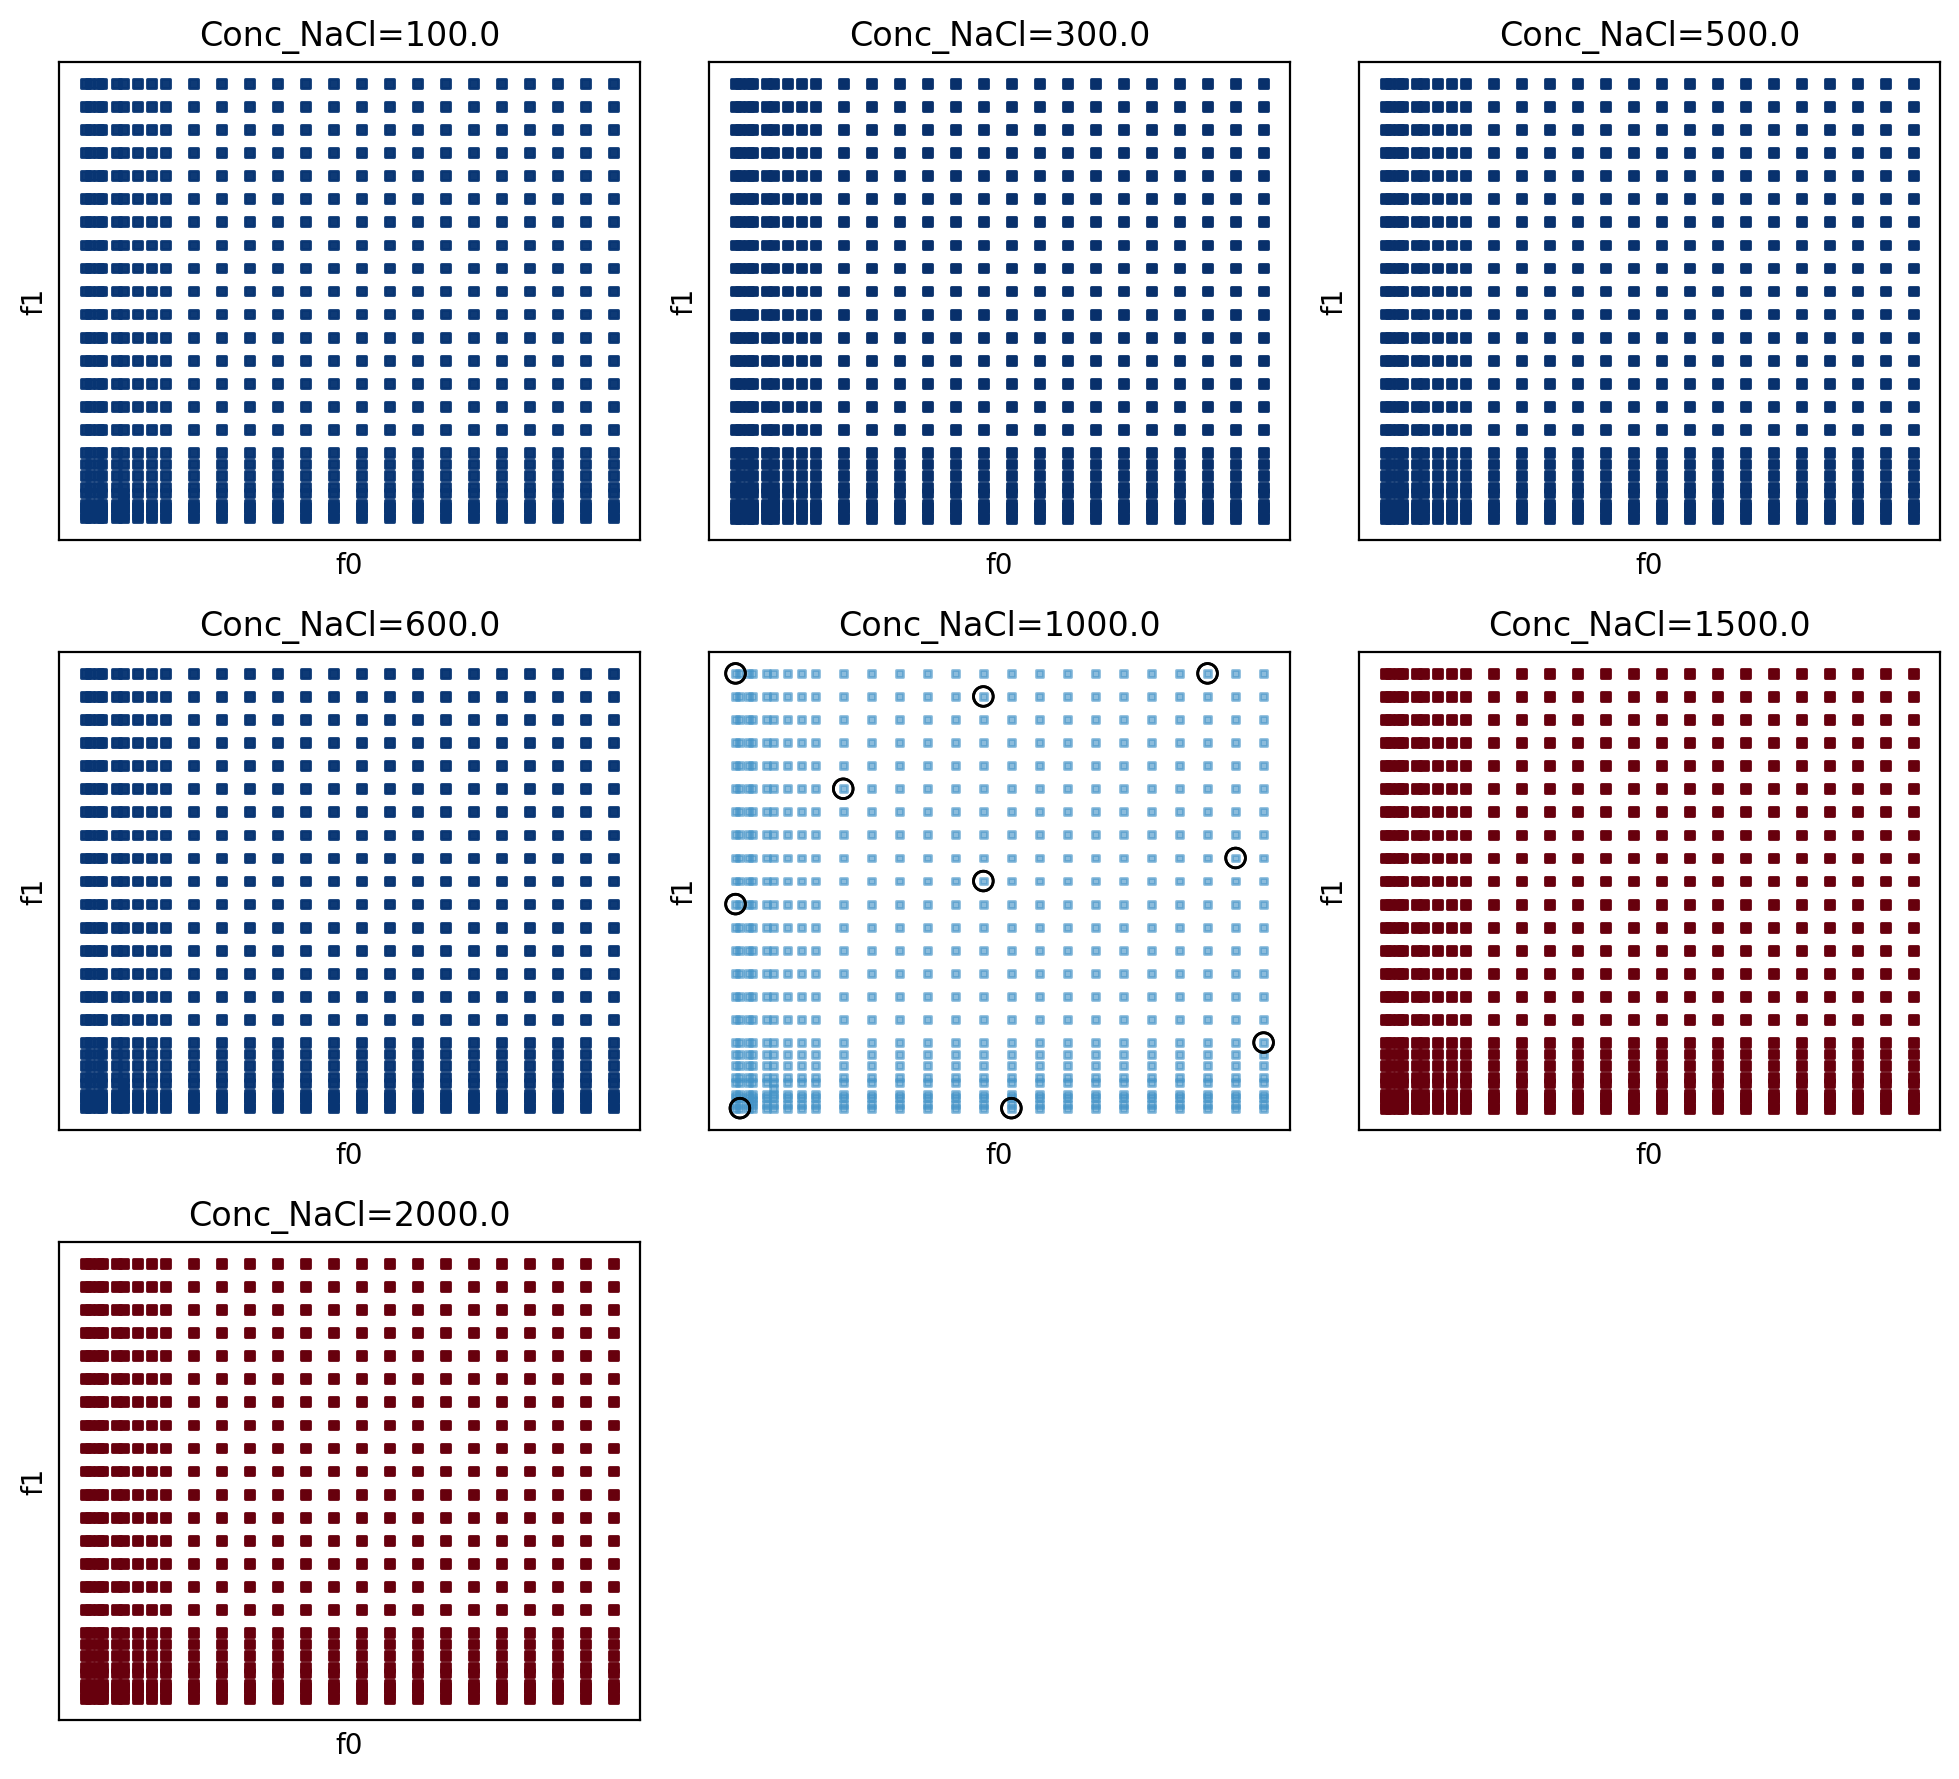

In [21]:
cmap_list = ['Reds', 'Blues', 'Greens']
_Z = al_clf.predict_proba(X=X)
Z = MinMaxScaler().fit_transform(_Z)
H = scipy.stats.entropy(pk=Z, axis=1)

fig, ax = get_axes(len(valorigami),3)

for c in range(2):
    alphas = get_alphas(Z=Z[:, c], scale=True)

    for i,val in enumerate(valorigami):

        val_mask = [j for j,v in enumerate(X[forigami].values) if v == val]
        # sizes = (Z[val_mask, c] * (H[val_mask]  - max(H)) * -1) + 0.005

        ax[i].scatter(X0.iloc[val_mask], X1.iloc[val_mask], 
                    c=Z[val_mask, c], cmap=cmap_list[c],
                    vmin=0., vmax=1.,
                    alpha=alphas[val_mask],
                    s=Z[val_mask, c]*10, 
                    marker='s')
            
        choosen_pts = [p for p in val_mask if p in new_idxs_fps]
            
        if len(choosen_pts) > 0:
            ax[i].scatter(X0.iloc[choosen_pts], X1.iloc[choosen_pts], 
                        edgecolor='0.', facecolor='none', 
                        s=50, zorder=3)
                

        ax[i].set_title(f'{forigami}={val}')

        ax[i].set_xlabel('f0')
        ax[i].set_ylabel('f1')
        ax[i].set_xticks(())
        ax[i].set_yticks(())

fig.tight_layout()

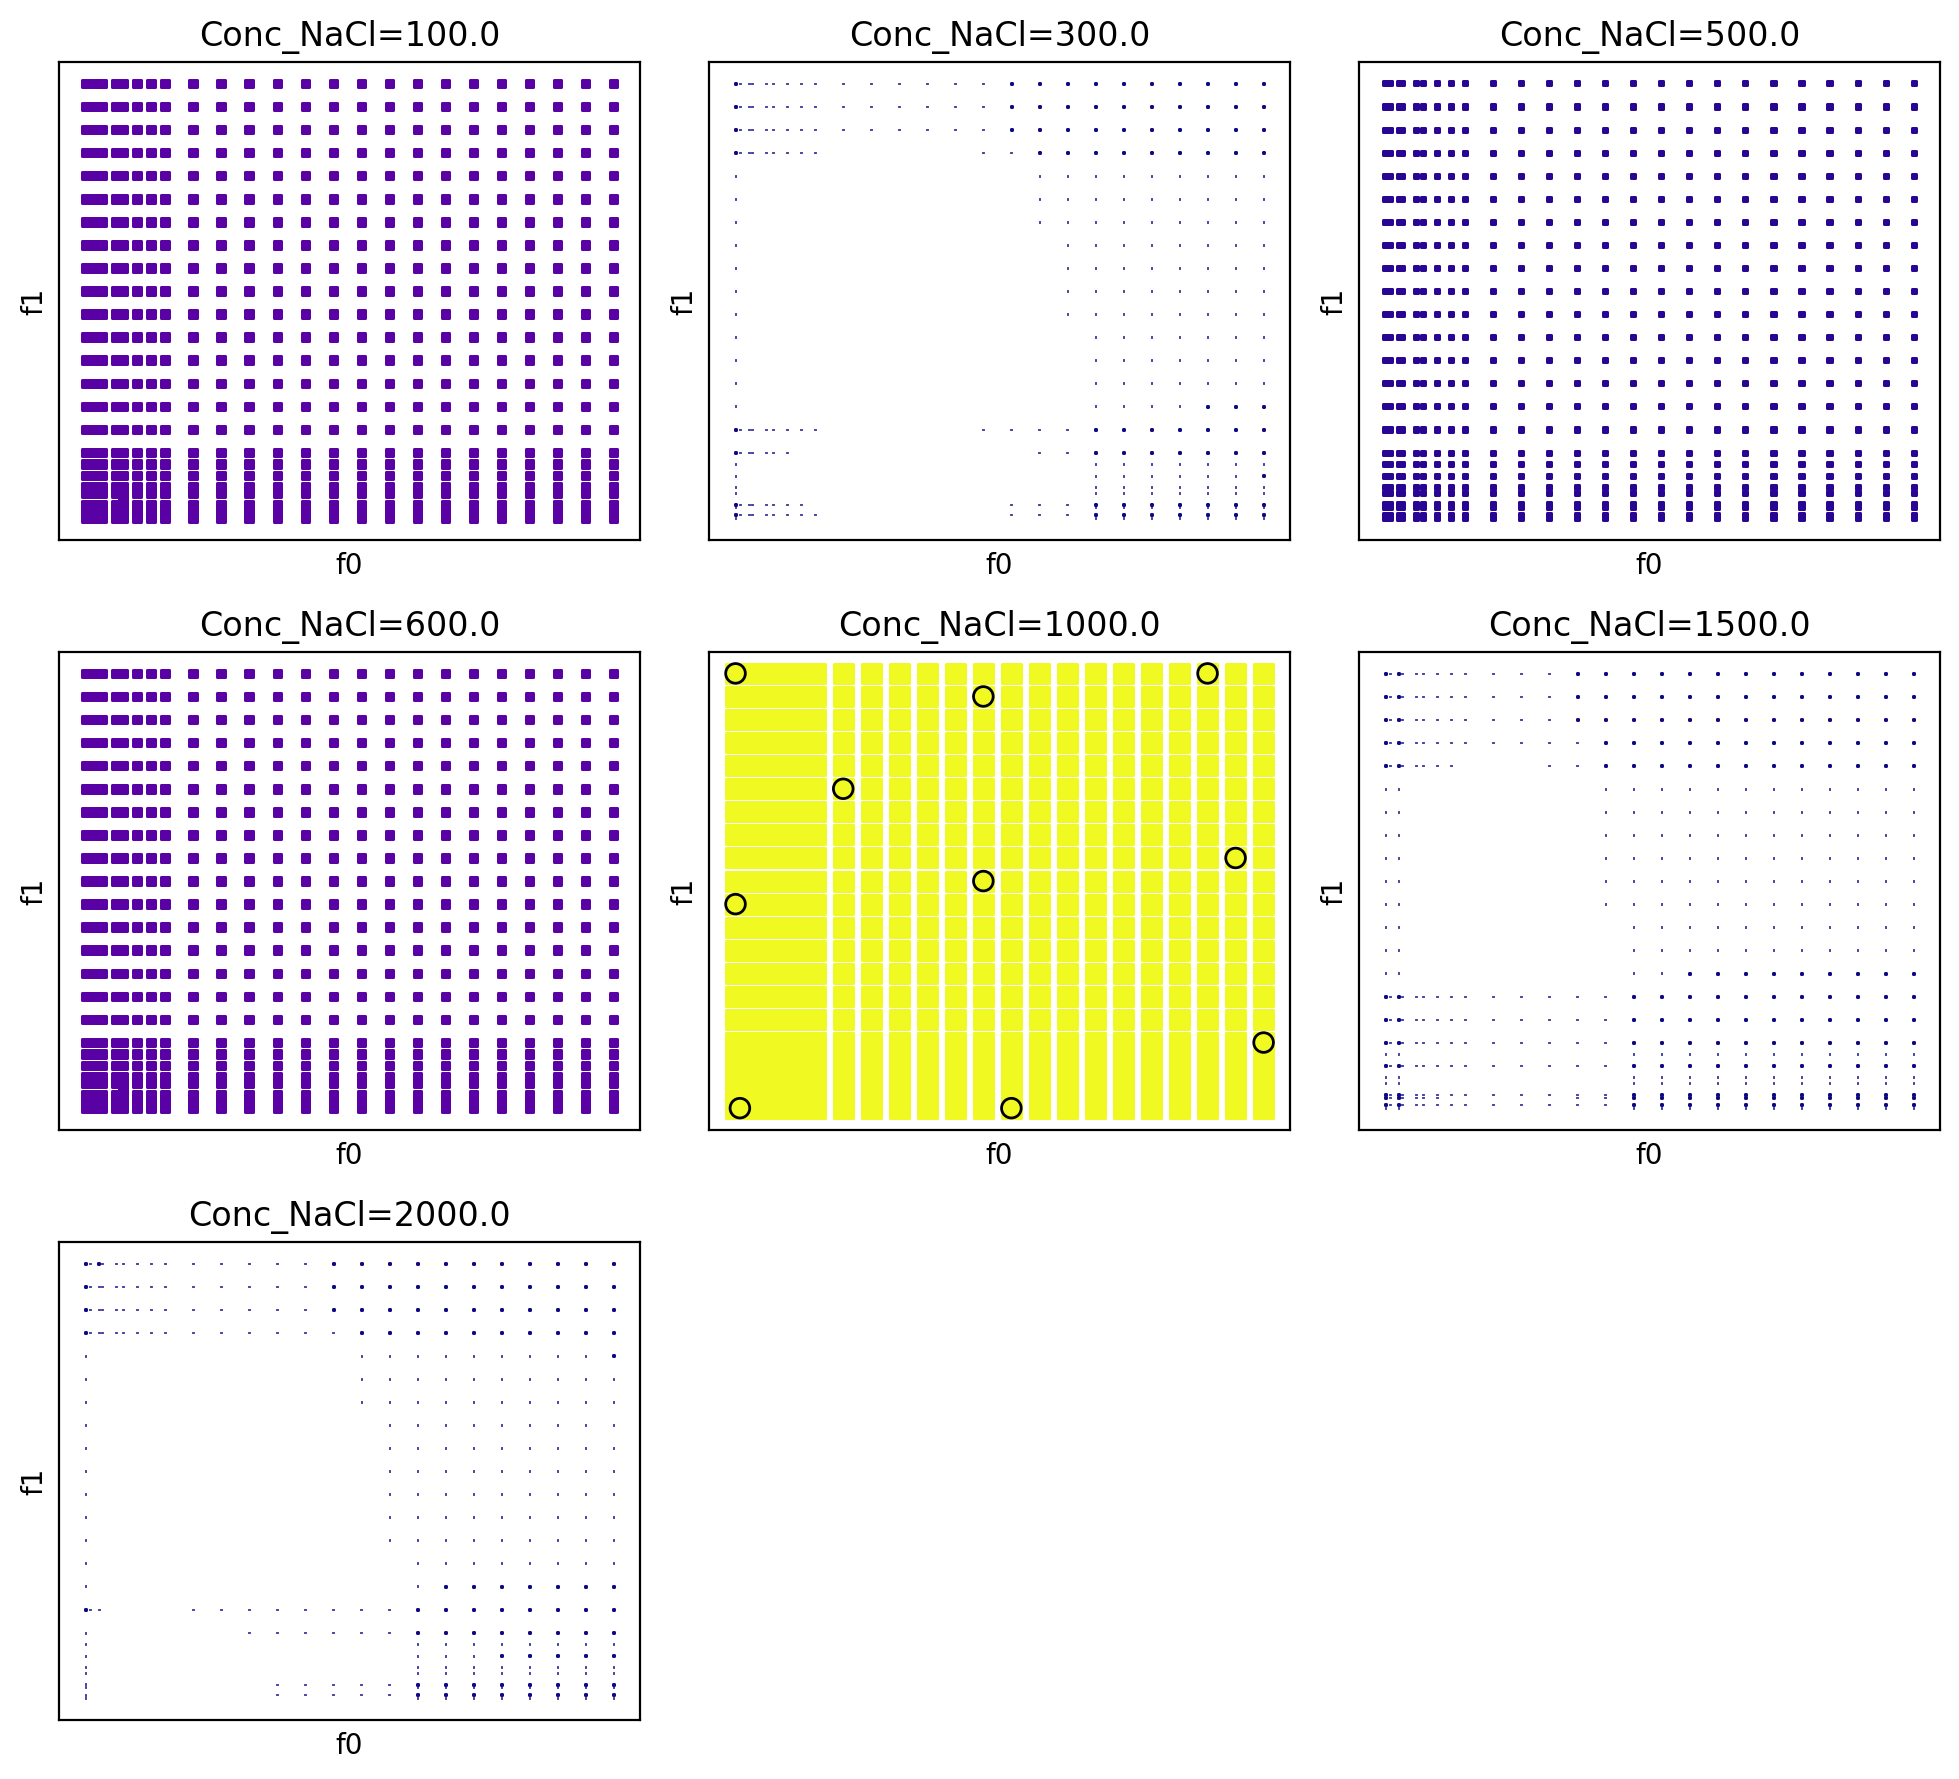

In [22]:
fig, ax = get_axes(len(valorigami),3)

for i,val in enumerate(valorigami):

    val_mask = [i for i,v in enumerate(X[forigami].values) if v == val]
    choosen_pts = [p for p in val_mask if p in new_idxs_fps]
        
    if len(choosen_pts) > 0:
        ax[i].scatter(X0.iloc[choosen_pts], X1.iloc[choosen_pts], 
                    edgecolor='0.', facecolor='none', 
                    s=50, zorder=3)

    for c in range(2):
        # alphas = get_alphas(Z=Z[val_mask, c], scale=True)
        # sizes = (Z[val_mask, c] * (H[val_mask]  - max(H)) * -1) + 0.005

        ax[i].scatter(X0.iloc[val_mask], X1.iloc[val_mask], 
                    c=H[val_mask], cmap='plasma',
                    # alpha=alphas,
                    vmin=min(H), vmax=max(H),
                    s=H[val_mask]*70, #Z[val_mask, c]*15, 
                    marker='s')
        
        ax[i].set_title(f'{forigami}={val}')

    ax[i].set_xlabel('f0')
    ax[i].set_ylabel('f1')
    ax[i].set_xticks(())
    ax[i].set_yticks(())

fig.tight_layout()

## Naive Bayes

In [23]:
from classification import ClassifierModel

# define the classifier model
clf_model = 'NaiveBayes'

# specific parameters
clf_dict = None

al_clf = ClassifierModel(model=clf_model)

In [24]:
new_idxs_fps = active_learning_cycle(
    feature_space=(X, y),               # starting training feature space (points, classes)
    idxs=start_idxs,                    # starting indexes
    new_batch=n_batch,                  # number of points in outcome
    clfModel=al_clf,                    # initialised classifier
    acquisitionFunc=ac_func,            # aquisition mode
    screeningSelection=sampling_mode    # sampling methods for the points acquisition
    )
new_idxs_fps

[1615, 1841, 1622, 119, 1629, 1153, 290, 1636, 461, 2030]

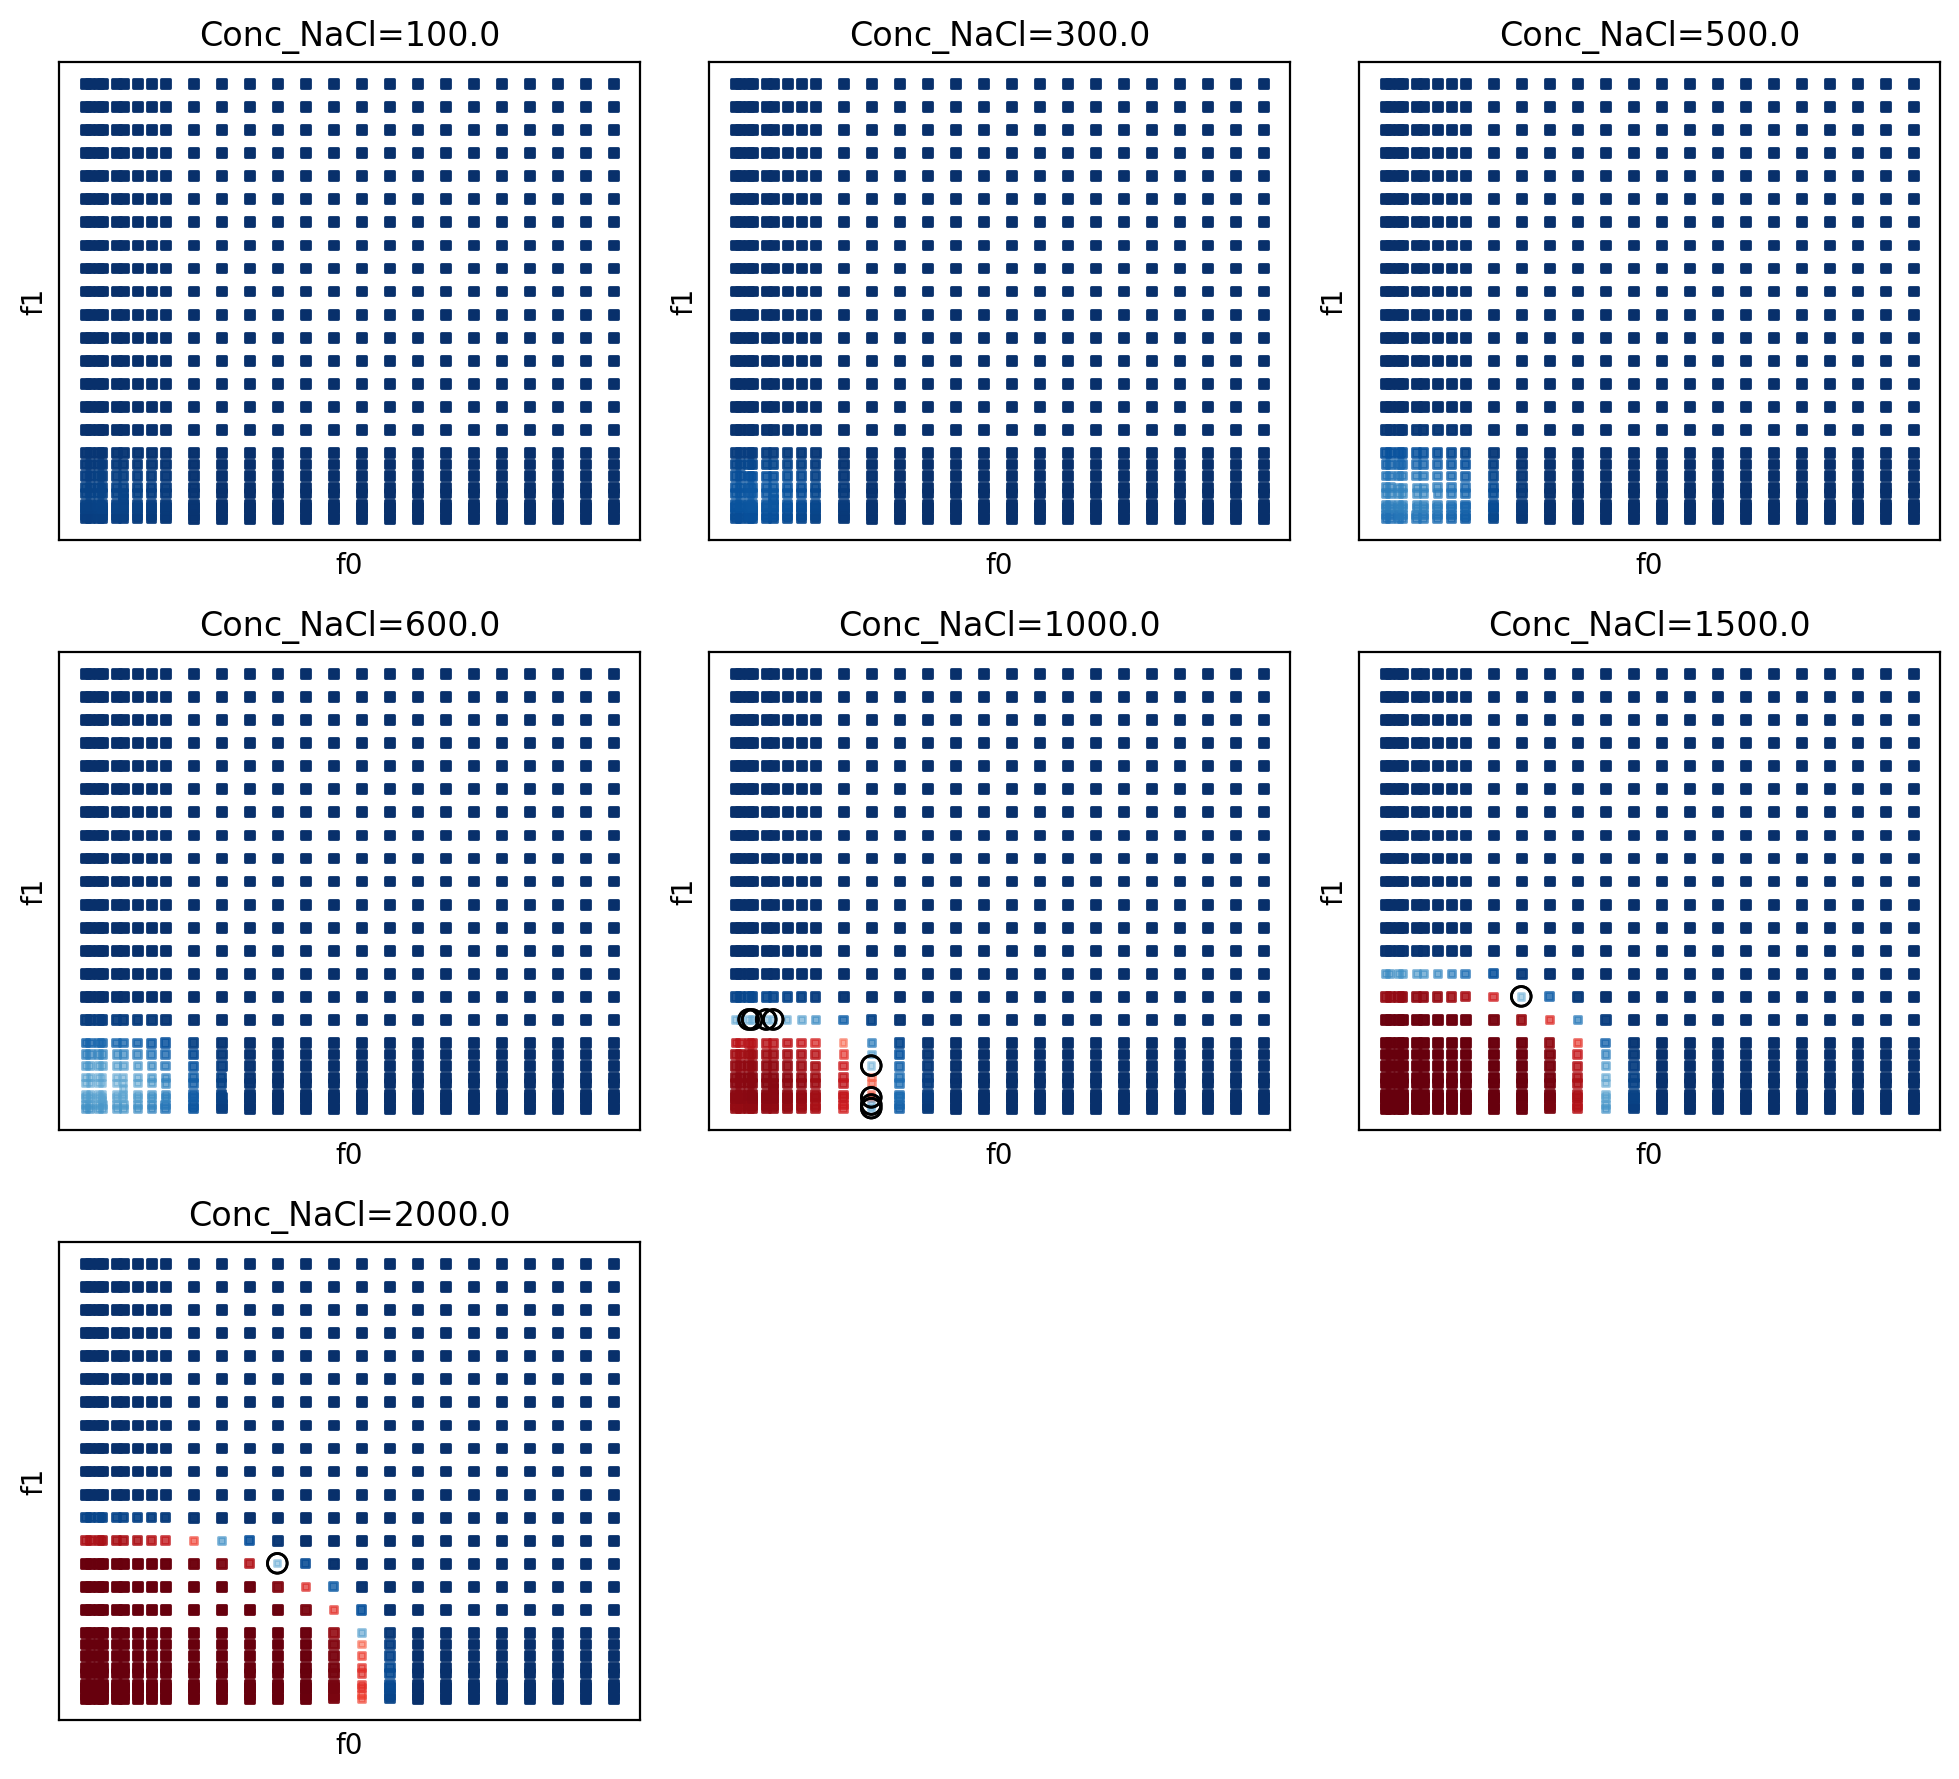

In [25]:
cmap_list = ['Reds', 'Blues', 'Greens']
_Z = al_clf.predict_proba(X=X)
Z = MinMaxScaler().fit_transform(_Z)
H = scipy.stats.entropy(pk=Z, axis=1)

fig, ax = get_axes(len(valorigami),3)

for c in range(2):
    alphas = get_alphas(Z=Z[:, c], scale=True)

    for i,val in enumerate(valorigami):

        val_mask = [j for j,v in enumerate(X[forigami].values) if v == val]
        # sizes = (Z[val_mask, c] * (H[val_mask]  - max(H)) * -1) + 0.005

        ax[i].scatter(X0.iloc[val_mask], X1.iloc[val_mask], 
                    c=Z[val_mask, c], cmap=cmap_list[c],
                    vmin=0., vmax=1.,
                    alpha=alphas[val_mask],
                    s=Z[val_mask, c]*10, 
                    marker='s')
            
        choosen_pts = [p for p in val_mask if p in new_idxs_fps]
            
        if len(choosen_pts) > 0:
            ax[i].scatter(X0.iloc[choosen_pts], X1.iloc[choosen_pts], 
                        edgecolor='0.', facecolor='none', 
                        s=50, zorder=3)
                

        ax[i].set_title(f'{forigami}={val}')

        ax[i].set_xlabel('f0')
        ax[i].set_ylabel('f1')
        ax[i].set_xticks(())
        ax[i].set_yticks(())

fig.tight_layout()

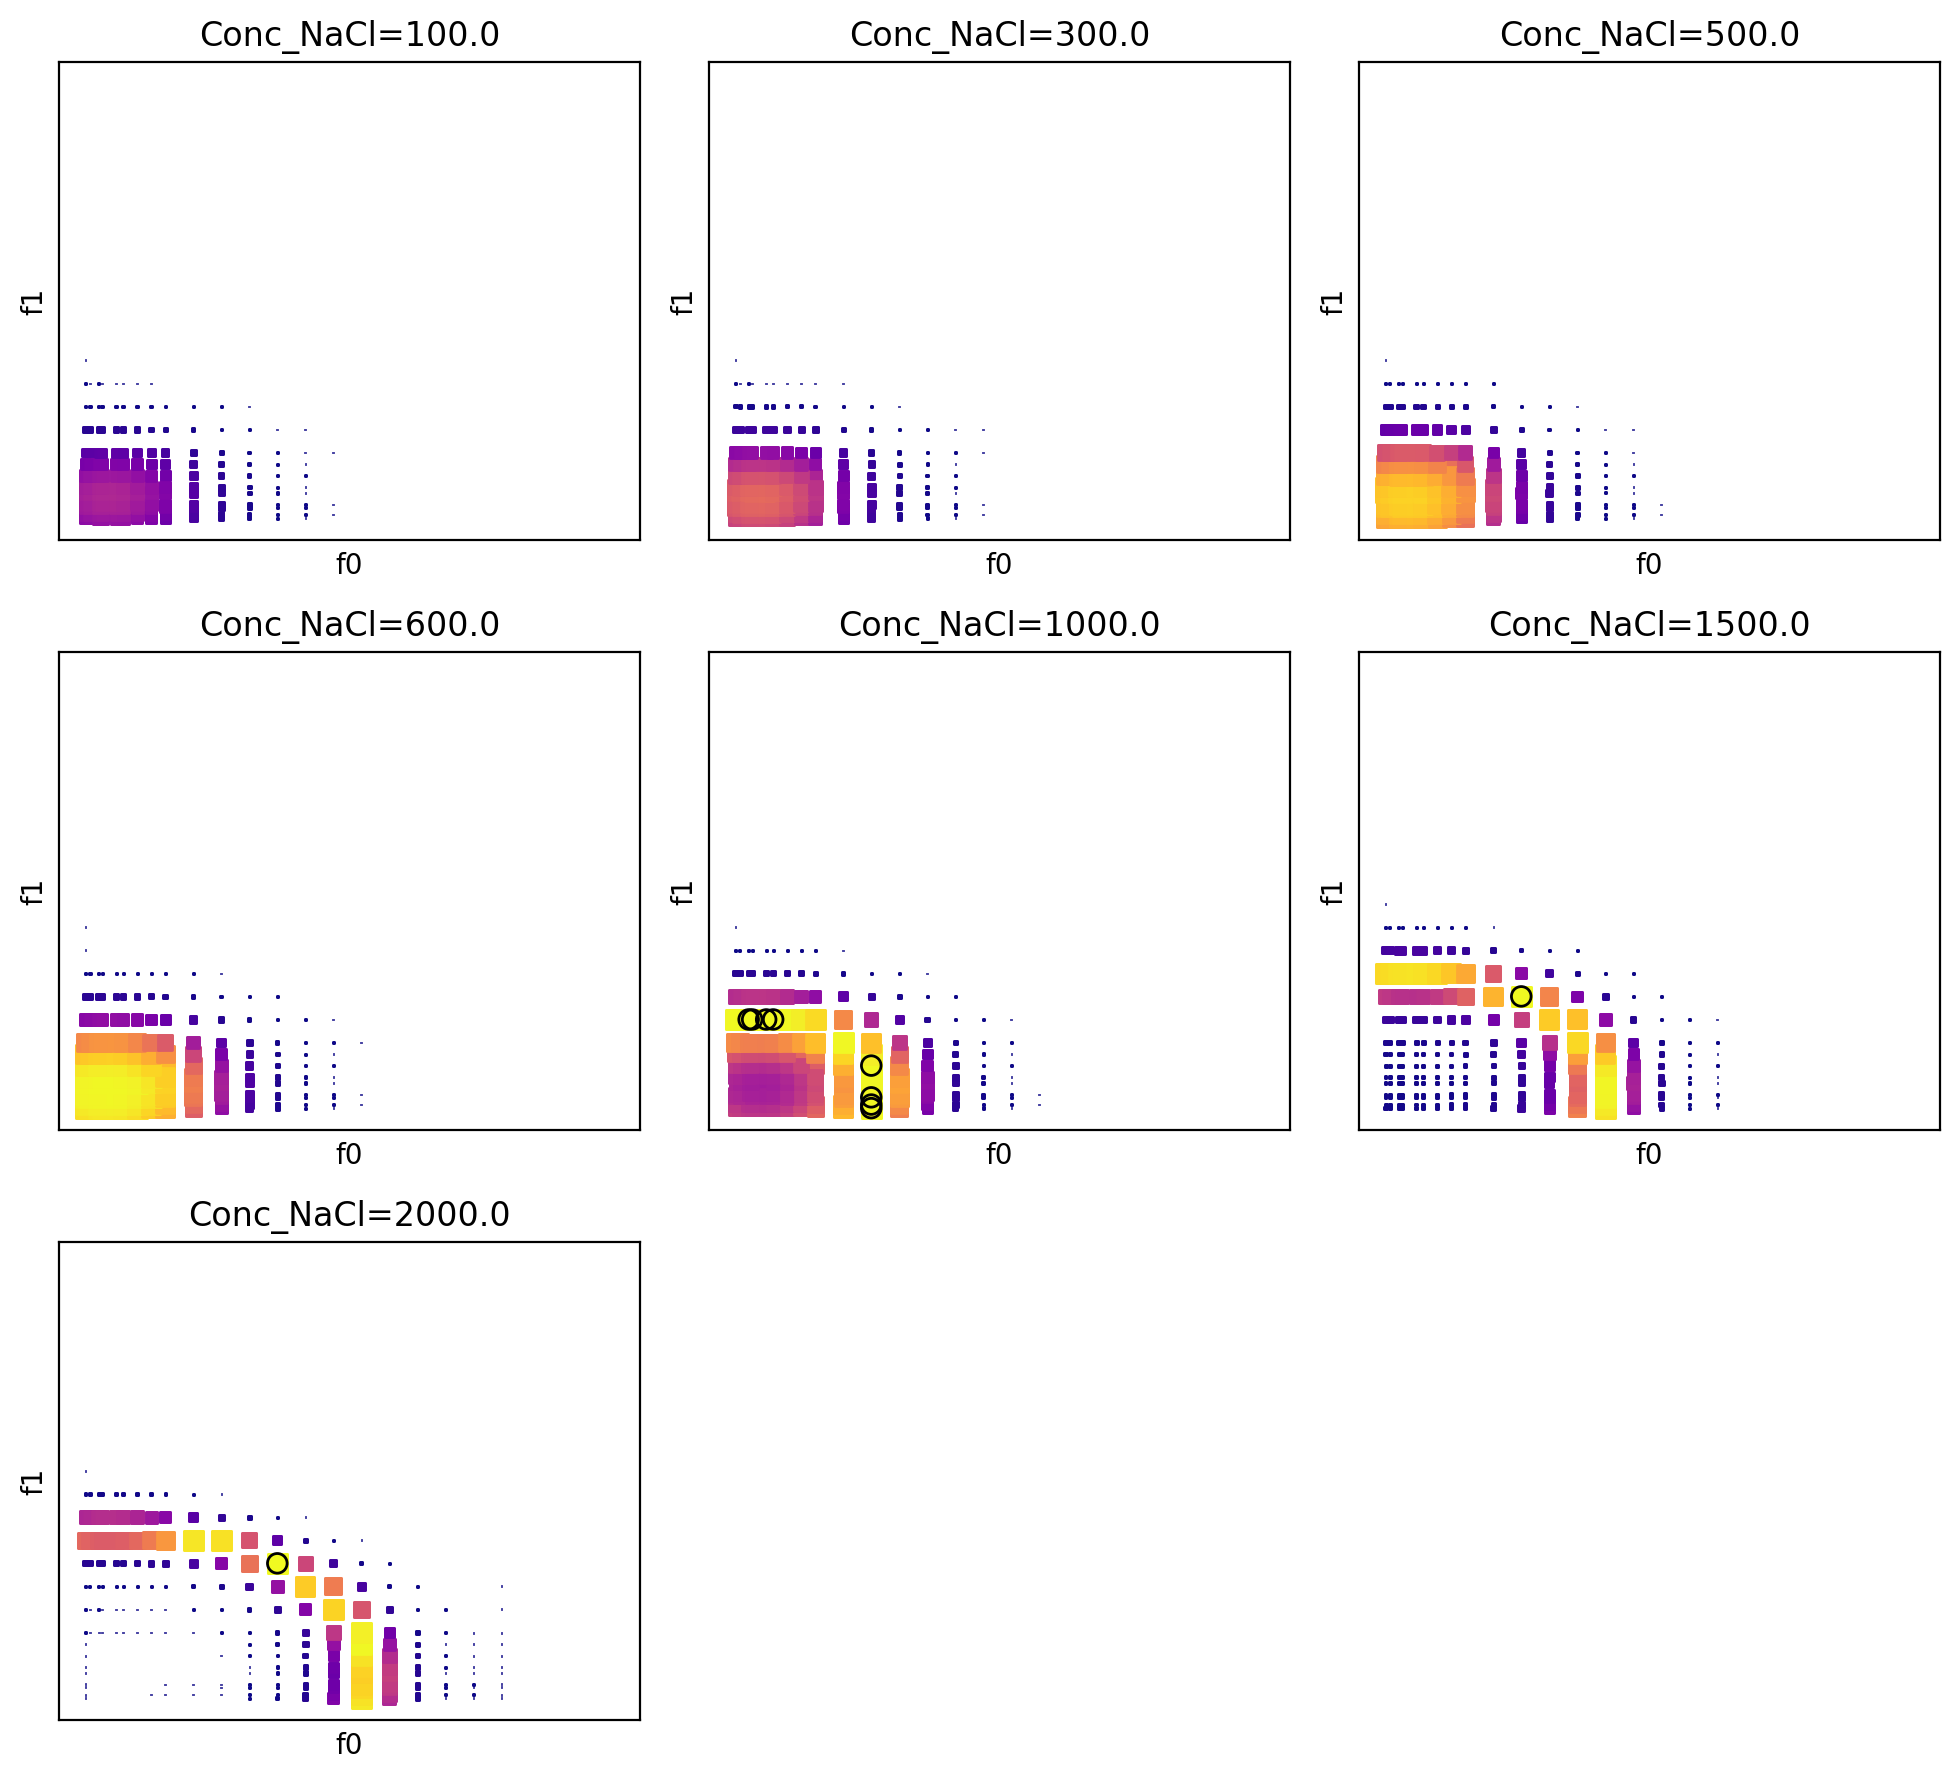

In [26]:
fig, ax = get_axes(len(valorigami),3)

for i,val in enumerate(valorigami):

    val_mask = [i for i,v in enumerate(X[forigami].values) if v == val]
    choosen_pts = [p for p in val_mask if p in new_idxs_fps]
        
    if len(choosen_pts) > 0:
        ax[i].scatter(X0.iloc[choosen_pts], X1.iloc[choosen_pts], 
                    edgecolor='0.', facecolor='none', 
                    s=50, zorder=3)

    for c in range(2):
        # alphas = get_alphas(Z=Z[val_mask, c], scale=True)
        # sizes = (Z[val_mask, c] * (H[val_mask]  - max(H)) * -1) + 0.005

        ax[i].scatter(X0.iloc[val_mask], X1.iloc[val_mask], 
                    c=H[val_mask], cmap='plasma',
                    # alpha=alphas,
                    vmin=min(H), vmax=max(H),
                    s=H[val_mask]*70, #Z[val_mask, c]*15, 
                    marker='s')
        
        ax[i].set_title(f'{forigami}={val}')

    ax[i].set_xlabel('f0')
    ax[i].set_ylabel('f1')
    ax[i].set_xticks(())
    ax[i].set_yticks(())

fig.tight_layout()

## Random Forest

In [27]:
from classification import ClassifierModel

# define the classifier model
clf_model = 'RandomForest'

# specific parameters
clf_dict = dict(
    random_state = 73,
    max_depth=5, 
    n_estimators=10, 
    max_features=1,
)

al_clf = ClassifierModel(model=clf_model)

In [28]:
new_idxs_fps = active_learning_cycle(
    feature_space=(X, y),               # starting training feature space (points, classes)
    idxs=start_idxs,                    # starting indexes
    new_batch=n_batch,                  # number of points in outcome
    clfModel=al_clf,                    # initialised classifier
    acquisitionFunc=ac_func,            # aquisition mode
    screeningSelection=sampling_mode    # sampling methods for the points acquisition
    )
new_idxs_fps

Found 18 points that shares the same acquisition criteria.
Selecting 10 by 'FPS' sampling.


[224, 55, 4268, 2523, 3394, 975, 1827, 3743, 2870, 2174]

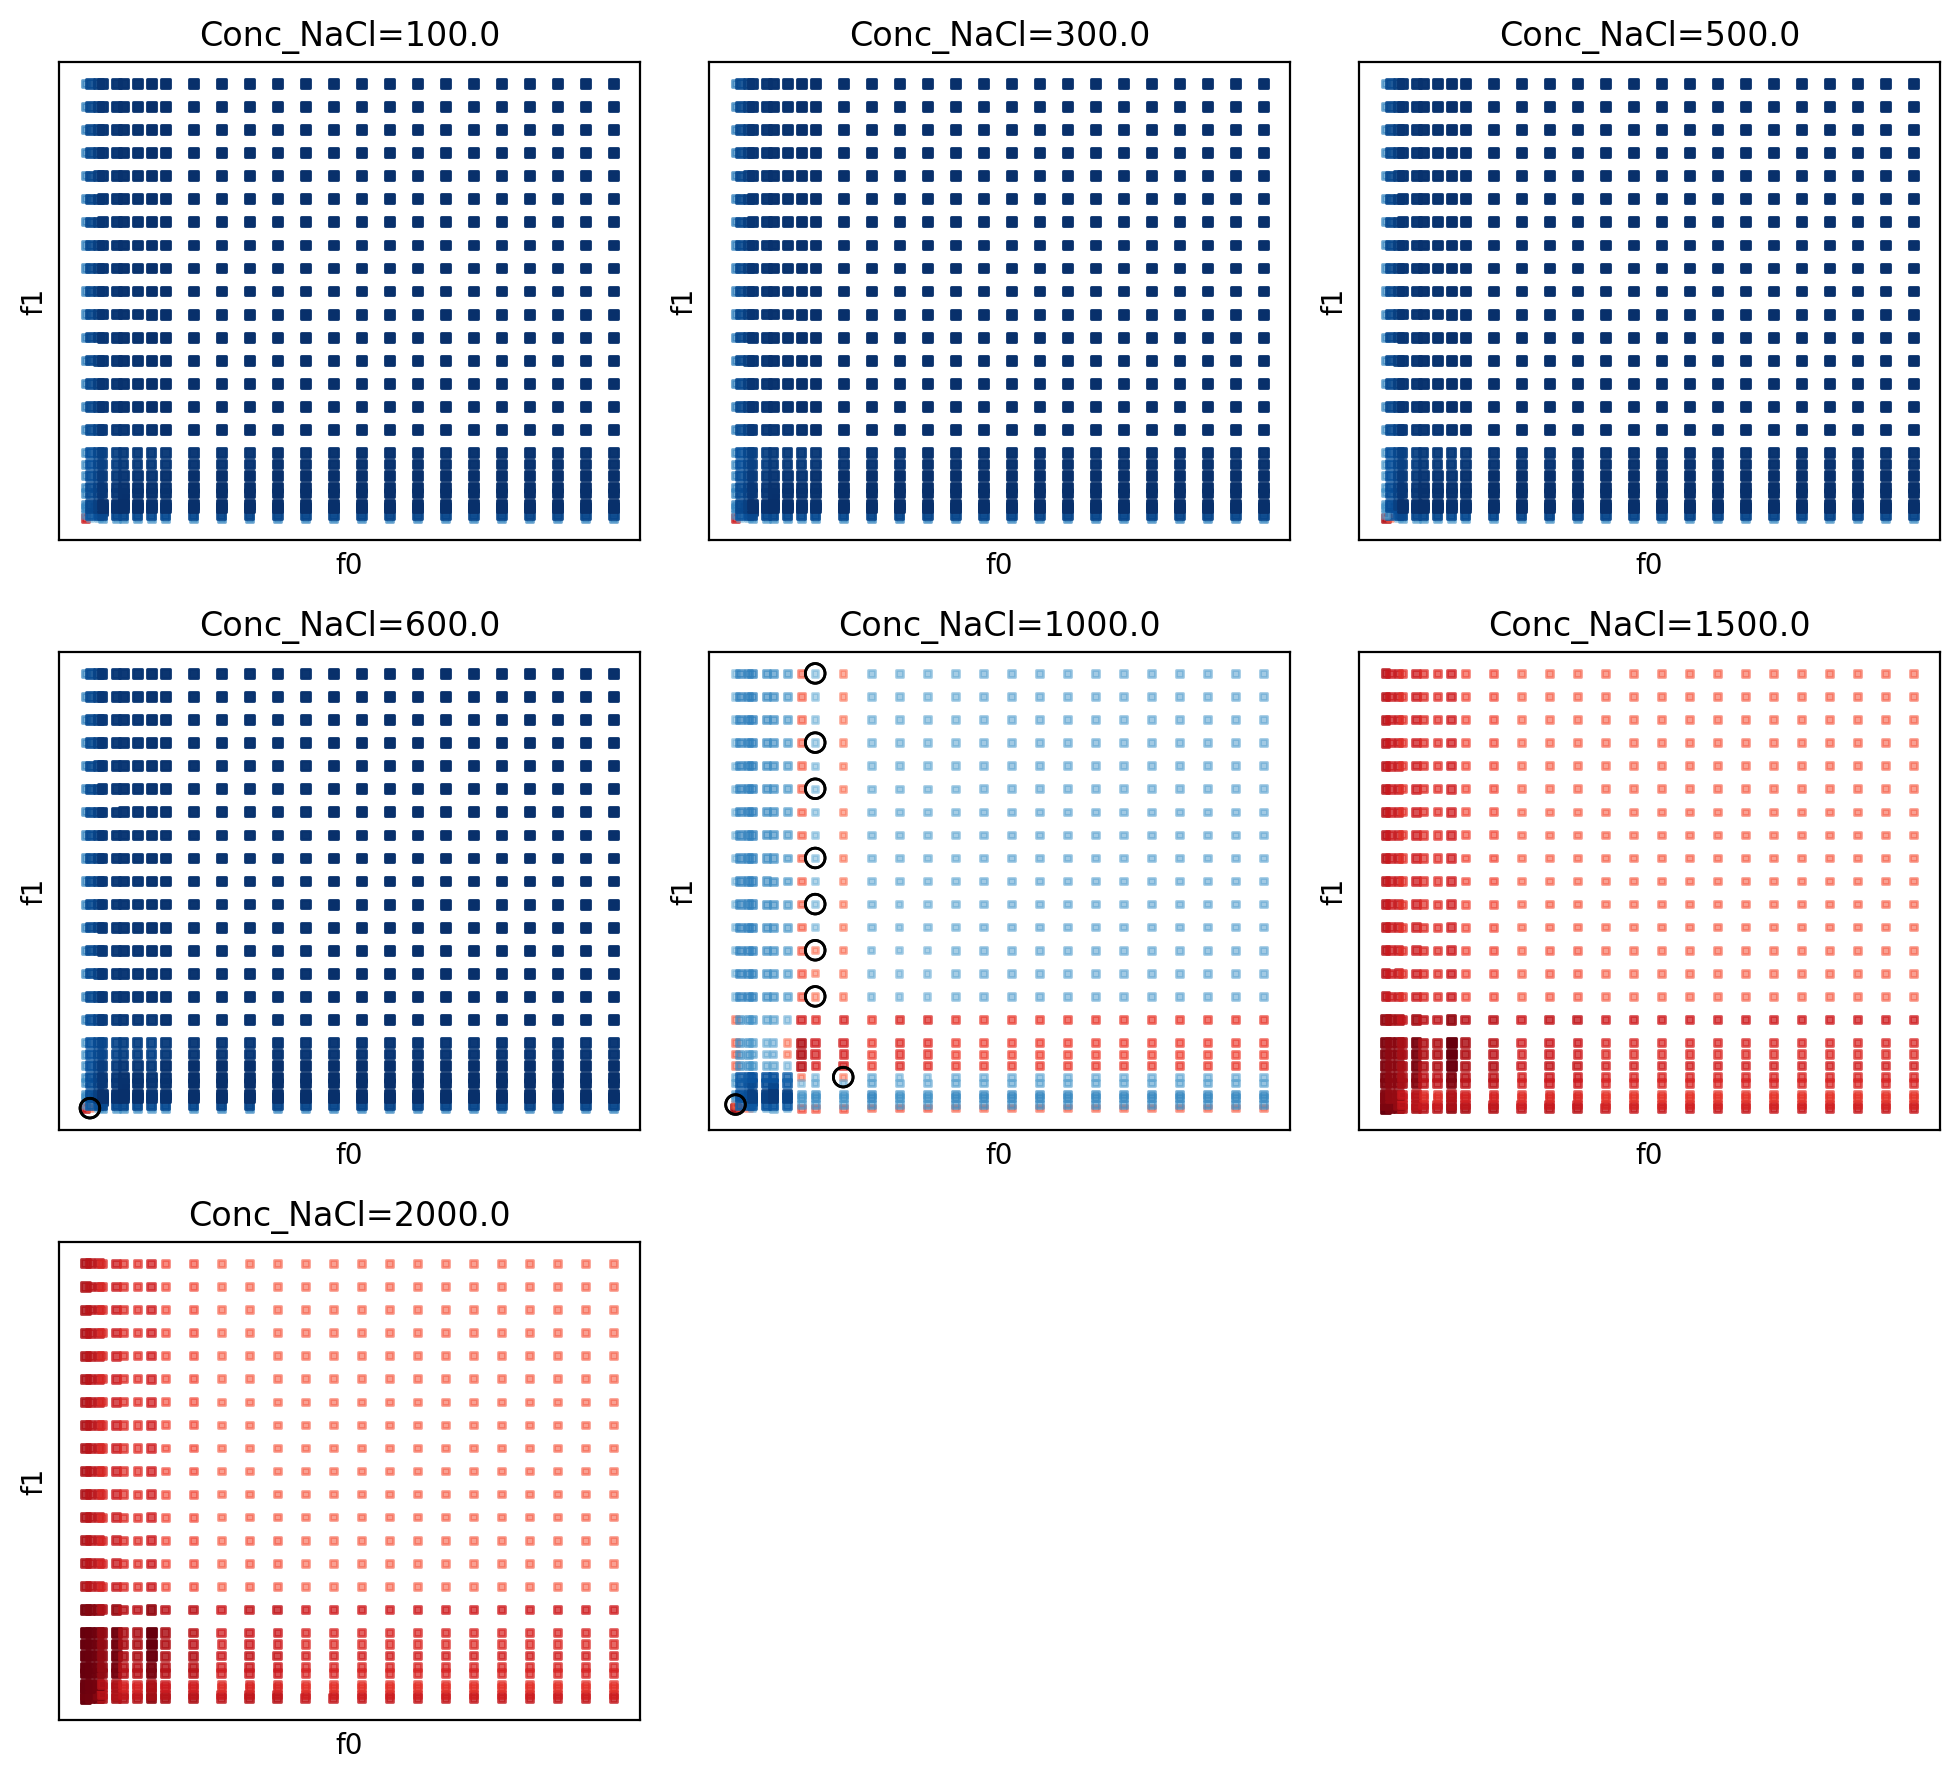

In [29]:
cmap_list = ['Reds', 'Blues', 'Greens']
_Z = al_clf.predict_proba(X=X)
Z = MinMaxScaler().fit_transform(_Z)
H = scipy.stats.entropy(pk=Z, axis=1)

fig, ax = get_axes(len(valorigami),3)

for c in range(2):
    alphas = get_alphas(Z=Z[:, c], scale=True)

    for i,val in enumerate(valorigami):

        val_mask = [j for j,v in enumerate(X[forigami].values) if v == val]
        # sizes = (Z[val_mask, c] * (H[val_mask]  - max(H)) * -1) + 0.005

        ax[i].scatter(X0.iloc[val_mask], X1.iloc[val_mask], 
                    c=Z[val_mask, c], cmap=cmap_list[c],
                    vmin=0., vmax=1.,
                    alpha=alphas[val_mask],
                    s=Z[val_mask, c]*10, 
                    marker='s')
            
        choosen_pts = [p for p in val_mask if p in new_idxs_fps]
            
        if len(choosen_pts) > 0:
            ax[i].scatter(X0.iloc[choosen_pts], X1.iloc[choosen_pts], 
                        edgecolor='0.', facecolor='none', 
                        s=50, zorder=3)
                

        ax[i].set_title(f'{forigami}={val}')

        ax[i].set_xlabel('f0')
        ax[i].set_ylabel('f1')
        ax[i].set_xticks(())
        ax[i].set_yticks(())

fig.tight_layout()

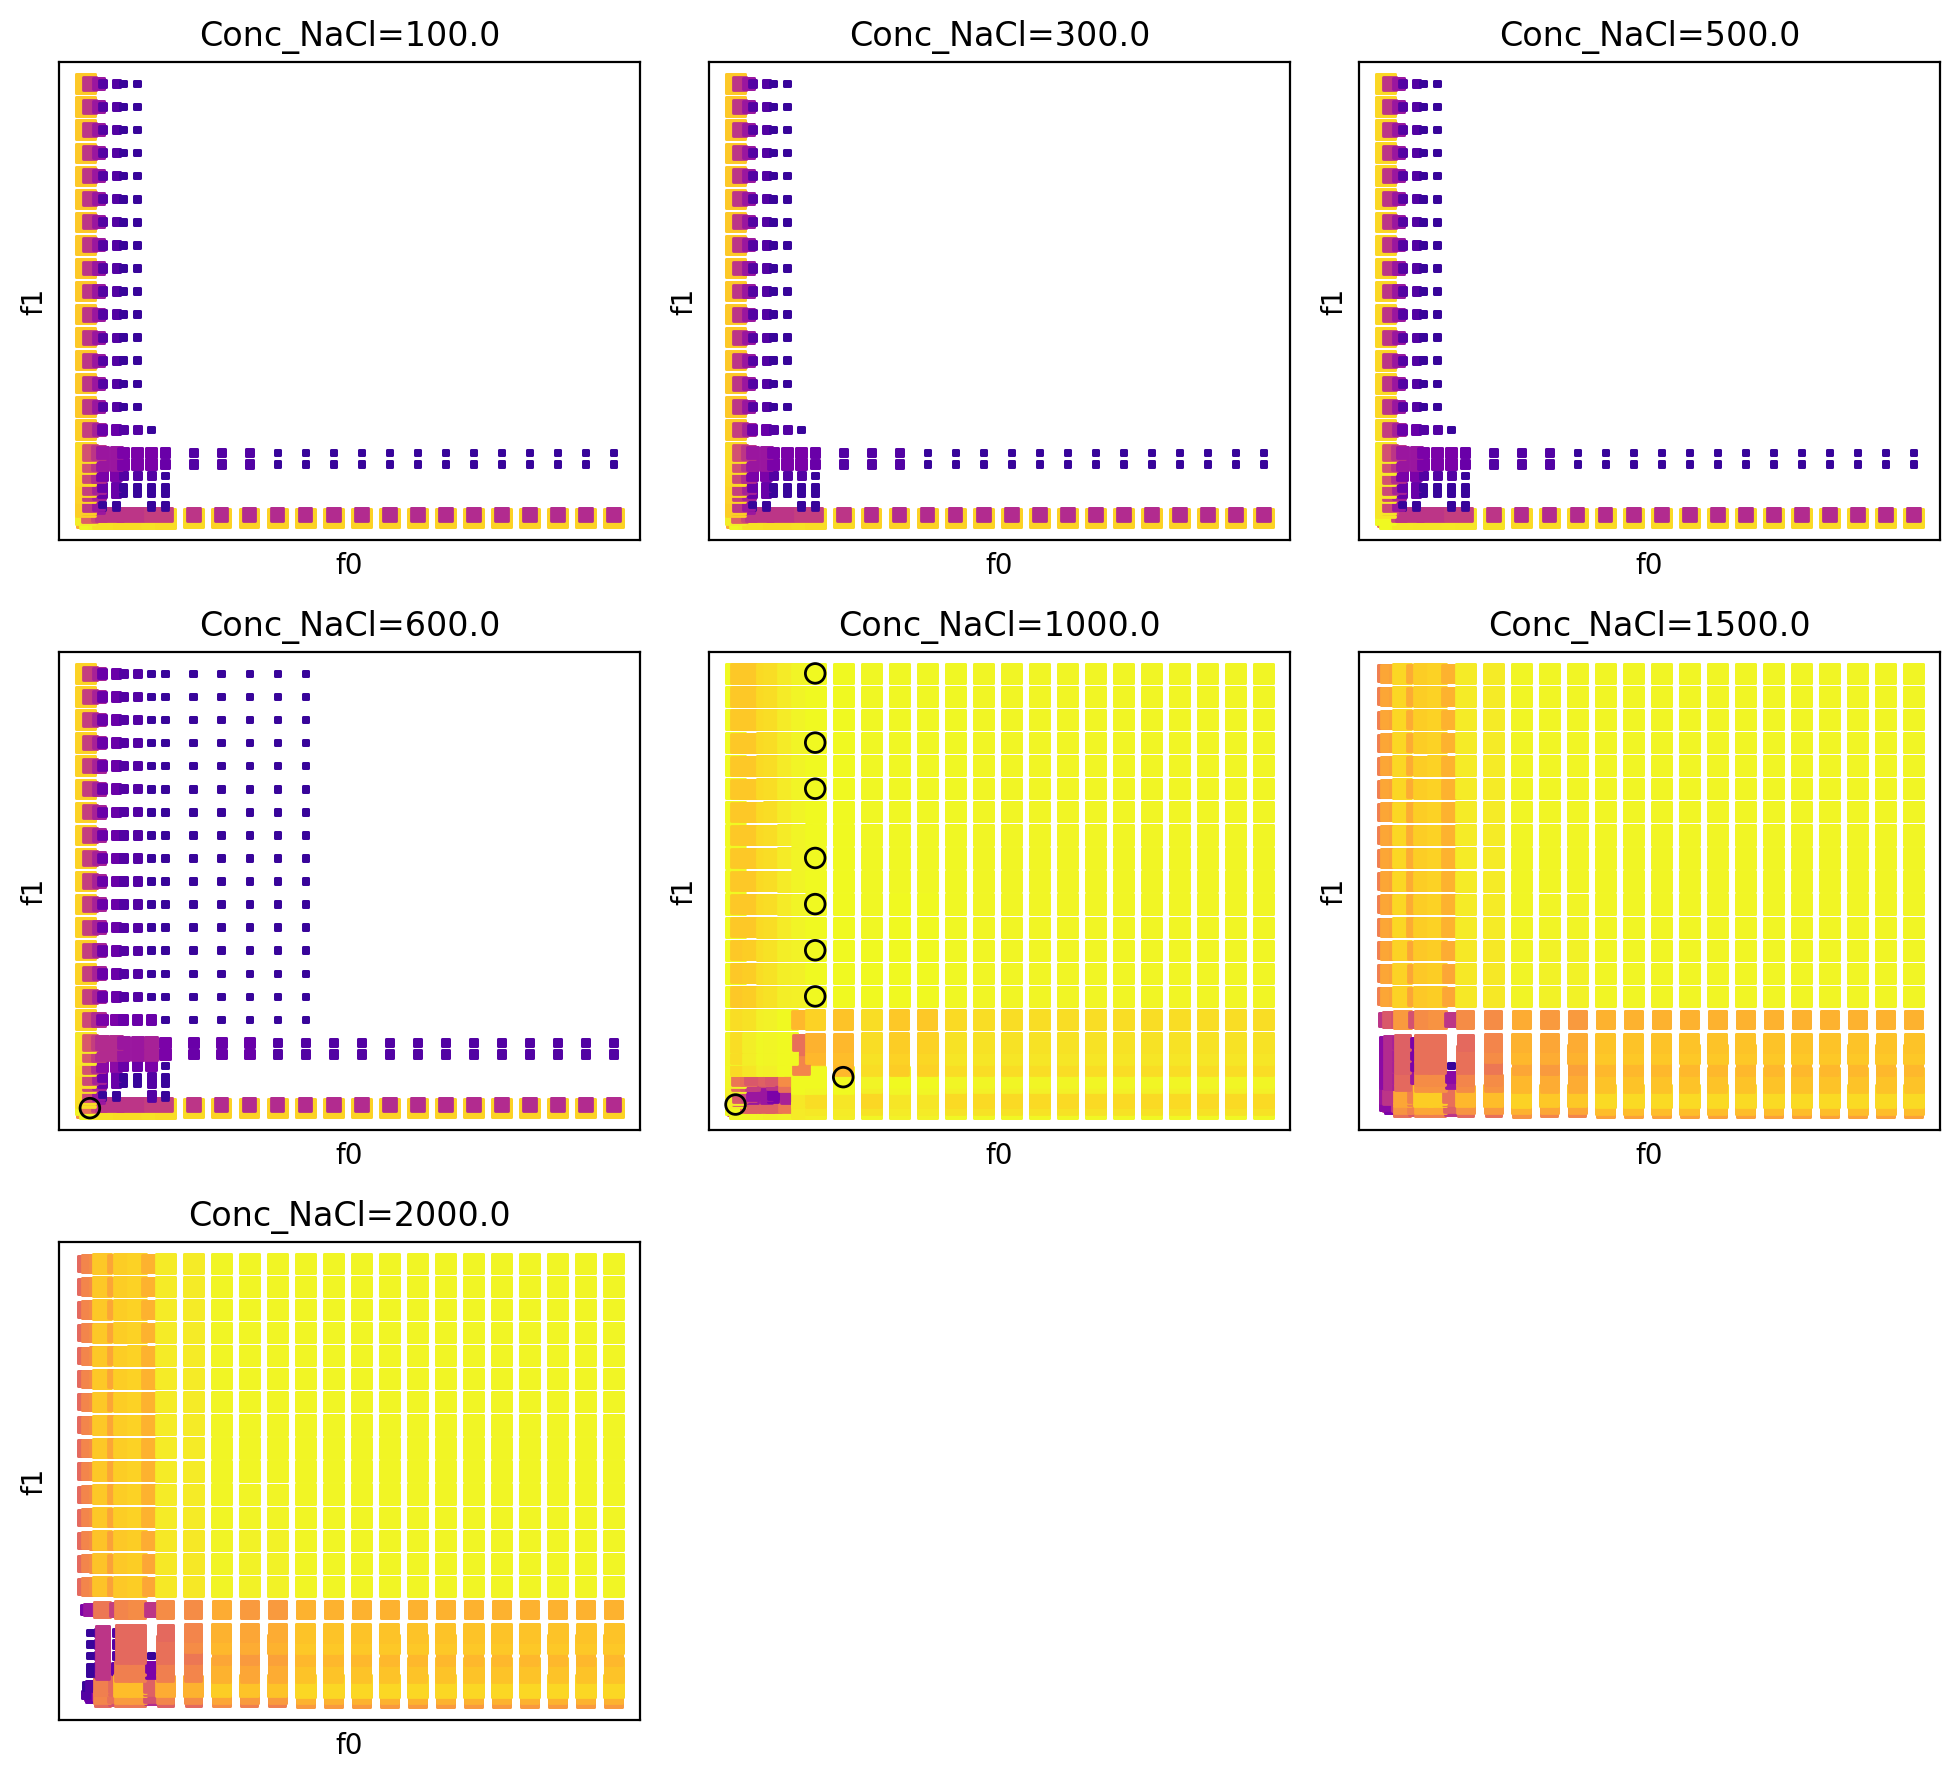

In [30]:
fig, ax = get_axes(len(valorigami),3)

for i,val in enumerate(valorigami):

    val_mask = [i for i,v in enumerate(X[forigami].values) if v == val]
    choosen_pts = [p for p in val_mask if p in new_idxs_fps]
        
    if len(choosen_pts) > 0:
        ax[i].scatter(X0.iloc[choosen_pts], X1.iloc[choosen_pts], 
                    edgecolor='0.', facecolor='none', 
                    s=50, zorder=3)

    for c in range(2):
        # alphas = get_alphas(Z=Z[val_mask, c], scale=True)
        # sizes = (Z[val_mask, c] * (H[val_mask]  - max(H)) * -1) + 0.005

        ax[i].scatter(X0.iloc[val_mask], X1.iloc[val_mask], 
                    c=H[val_mask], cmap='plasma',
                    # alpha=alphas,
                    vmin=min(H), vmax=max(H),
                    s=H[val_mask]*70, #Z[val_mask, c]*15, 
                    marker='s')
        
        ax[i].set_title(f'{forigami}={val}')

    ax[i].set_xlabel('f0')
    ax[i].set_ylabel('f1')
    ax[i].set_xticks(())
    ax[i].set_yticks(())

fig.tight_layout()

## MLPClassifier

In [31]:
from classification import ClassifierModel

# define the classifier model
clf_model = 'MLPC'

# specific parameters
clf_dict = dict(
    alpha=1, 
    max_iter=1000, 
    random_state=73
)

al_clf = ClassifierModel(model=clf_model)

In [32]:
new_idxs_fps = active_learning_cycle(
    feature_space=(X, y),               # starting training feature space (points, classes)
    idxs=start_idxs,                    # starting indexes
    new_batch=n_batch,                  # number of points in outcome
    clfModel=al_clf,                    # initialised classifier
    acquisitionFunc=ac_func,            # aquisition mode
    screeningSelection=sampling_mode    # sampling methods for the points acquisition
    )
new_idxs_fps

Found 19 points that shares the same acquisition criteria.
Selecting 10 by 'FPS' sampling.


/home/andreag/anaconda3/envs/coacerv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[149, 1779, 2990, 3724, 1665, 98, 2336, 1293, 2001, 1176]

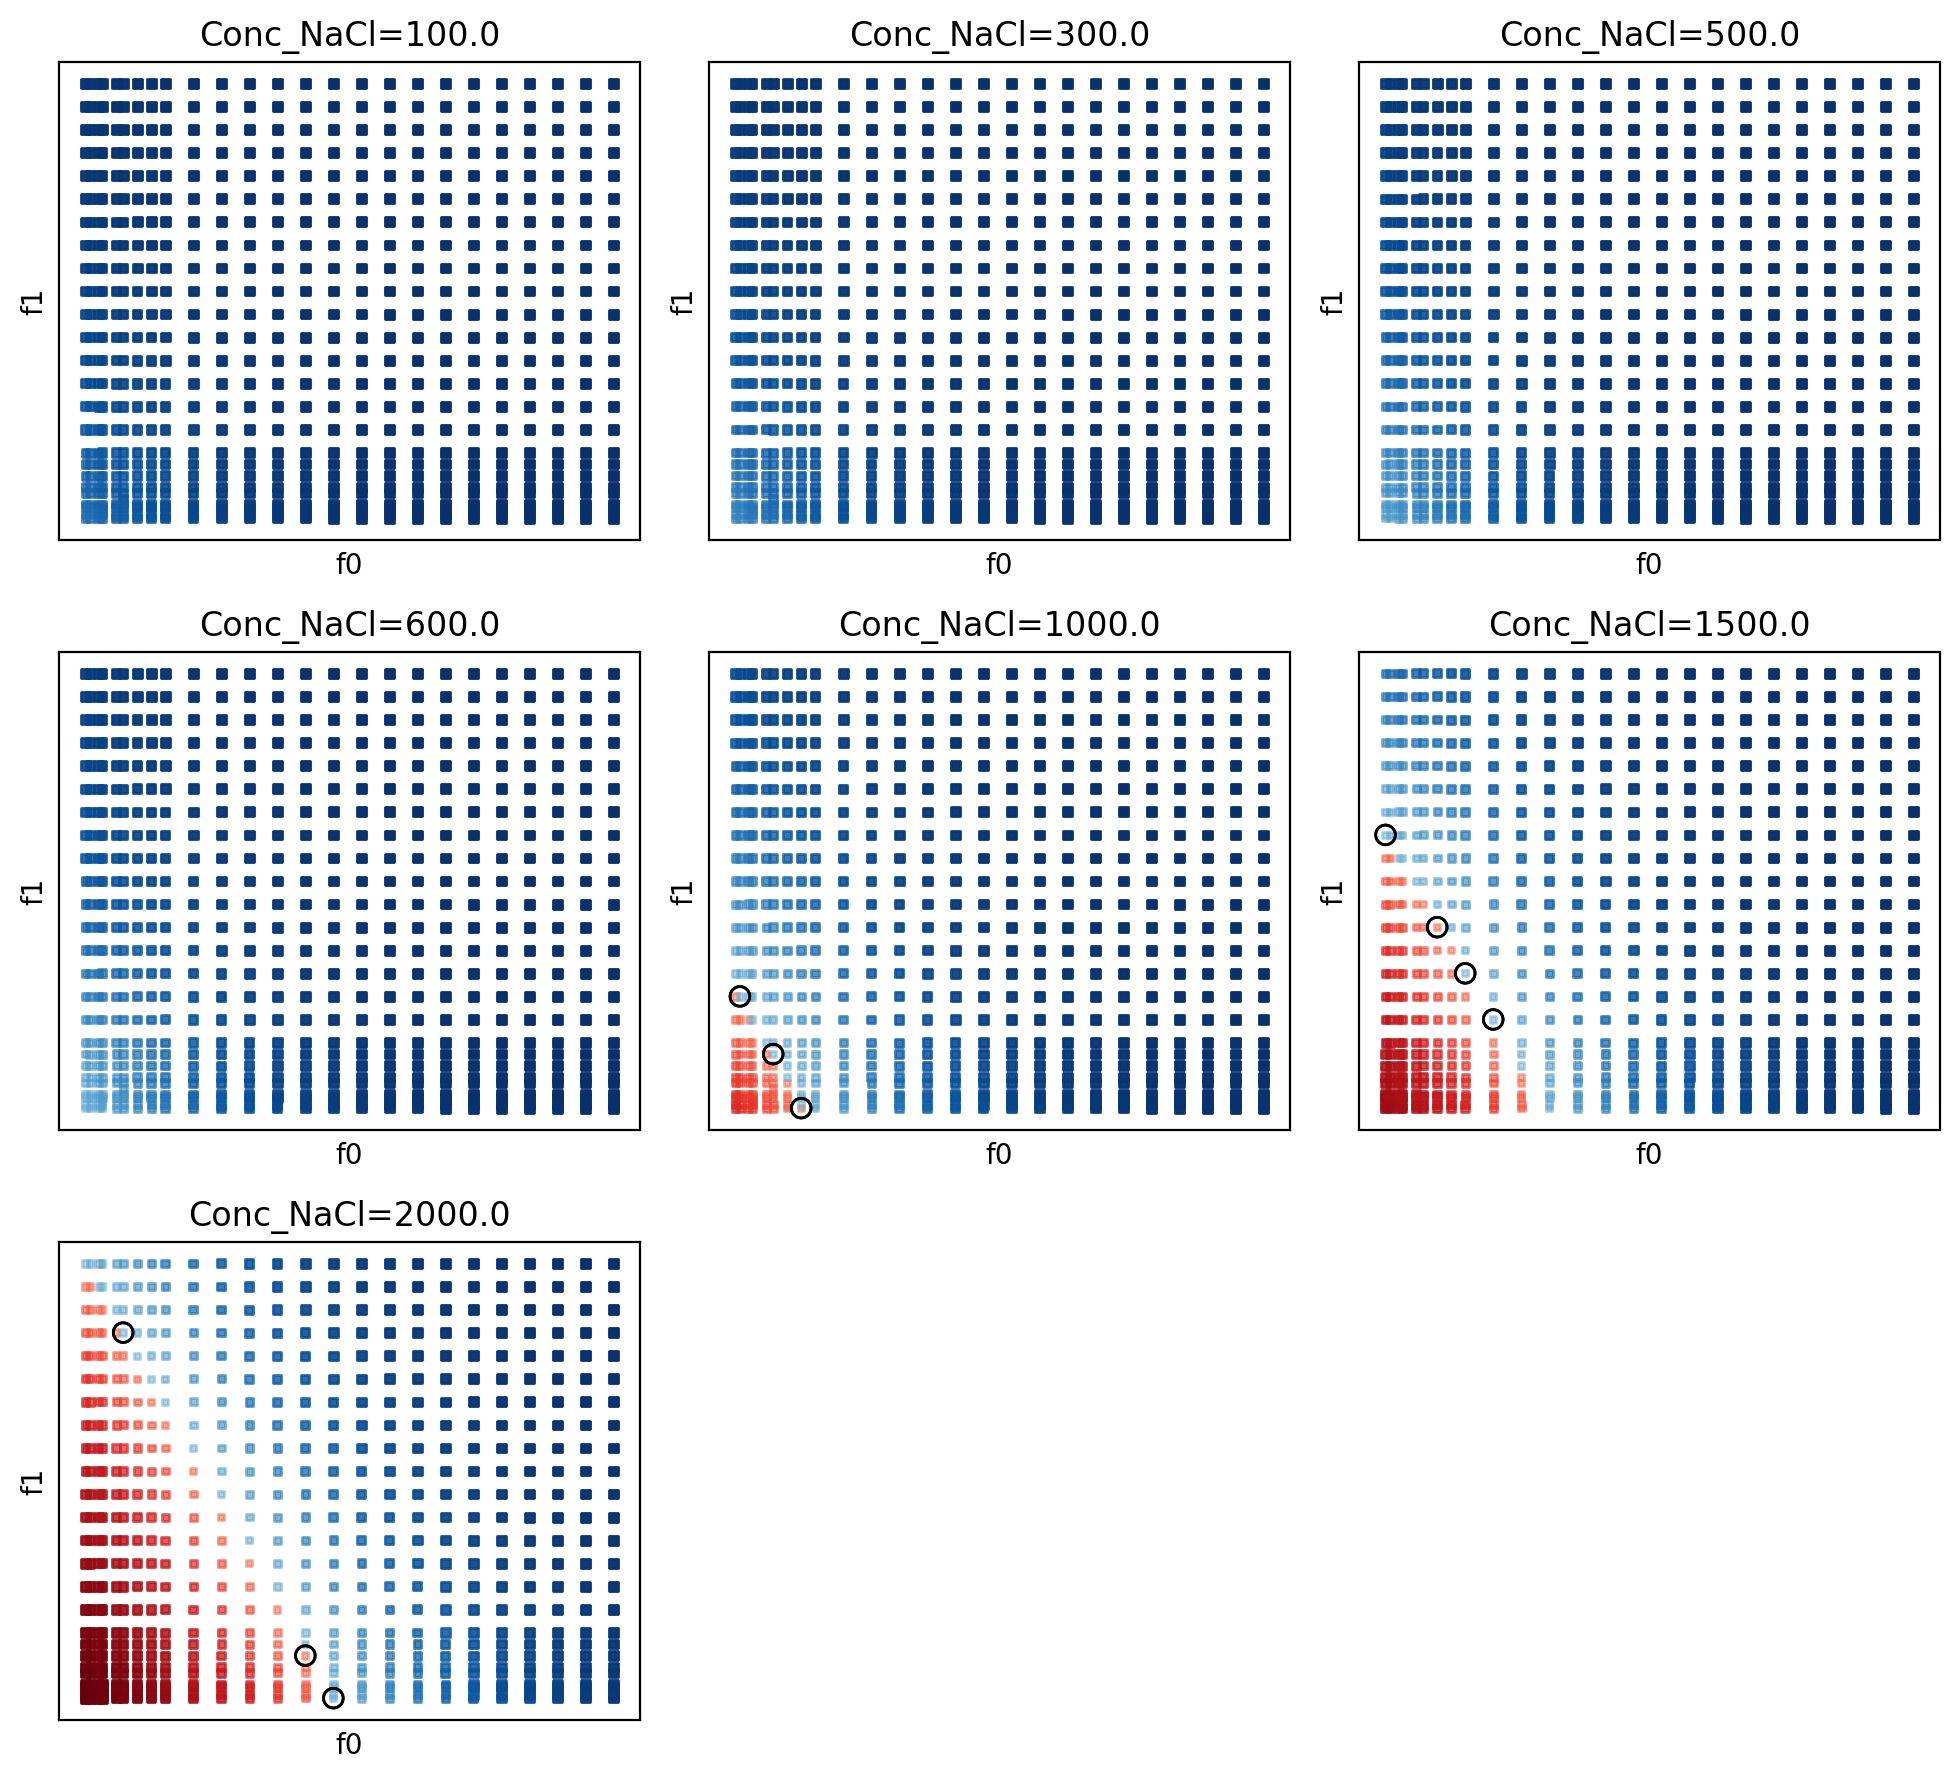

In [33]:
cmap_list = ['Reds', 'Blues', 'Greens']
_Z = al_clf.predict_proba(X=X)
Z = MinMaxScaler().fit_transform(_Z)
H = scipy.stats.entropy(pk=Z, axis=1)

fig, ax = get_axes(len(valorigami),3)

for c in range(2):
    alphas = get_alphas(Z=Z[:, c], scale=True)

    for i,val in enumerate(valorigami):

        val_mask = [j for j,v in enumerate(X[forigami].values) if v == val]
        # sizes = (Z[val_mask, c] * (H[val_mask]  - max(H)) * -1) + 0.005

        ax[i].scatter(X0.iloc[val_mask], X1.iloc[val_mask], 
                    c=Z[val_mask, c], cmap=cmap_list[c],
                    vmin=0., vmax=1.,
                    alpha=alphas[val_mask],
                    s=Z[val_mask, c]*10, 
                    marker='s')
            
        choosen_pts = [p for p in val_mask if p in new_idxs_fps]
            
        if len(choosen_pts) > 0:
            ax[i].scatter(X0.iloc[choosen_pts], X1.iloc[choosen_pts], 
                        edgecolor='0.', facecolor='none', 
                        s=50, zorder=3)
                

        ax[i].set_title(f'{forigami}={val}')

        ax[i].set_xlabel('f0')
        ax[i].set_ylabel('f1')
        ax[i].set_xticks(())
        ax[i].set_yticks(())

fig.tight_layout()

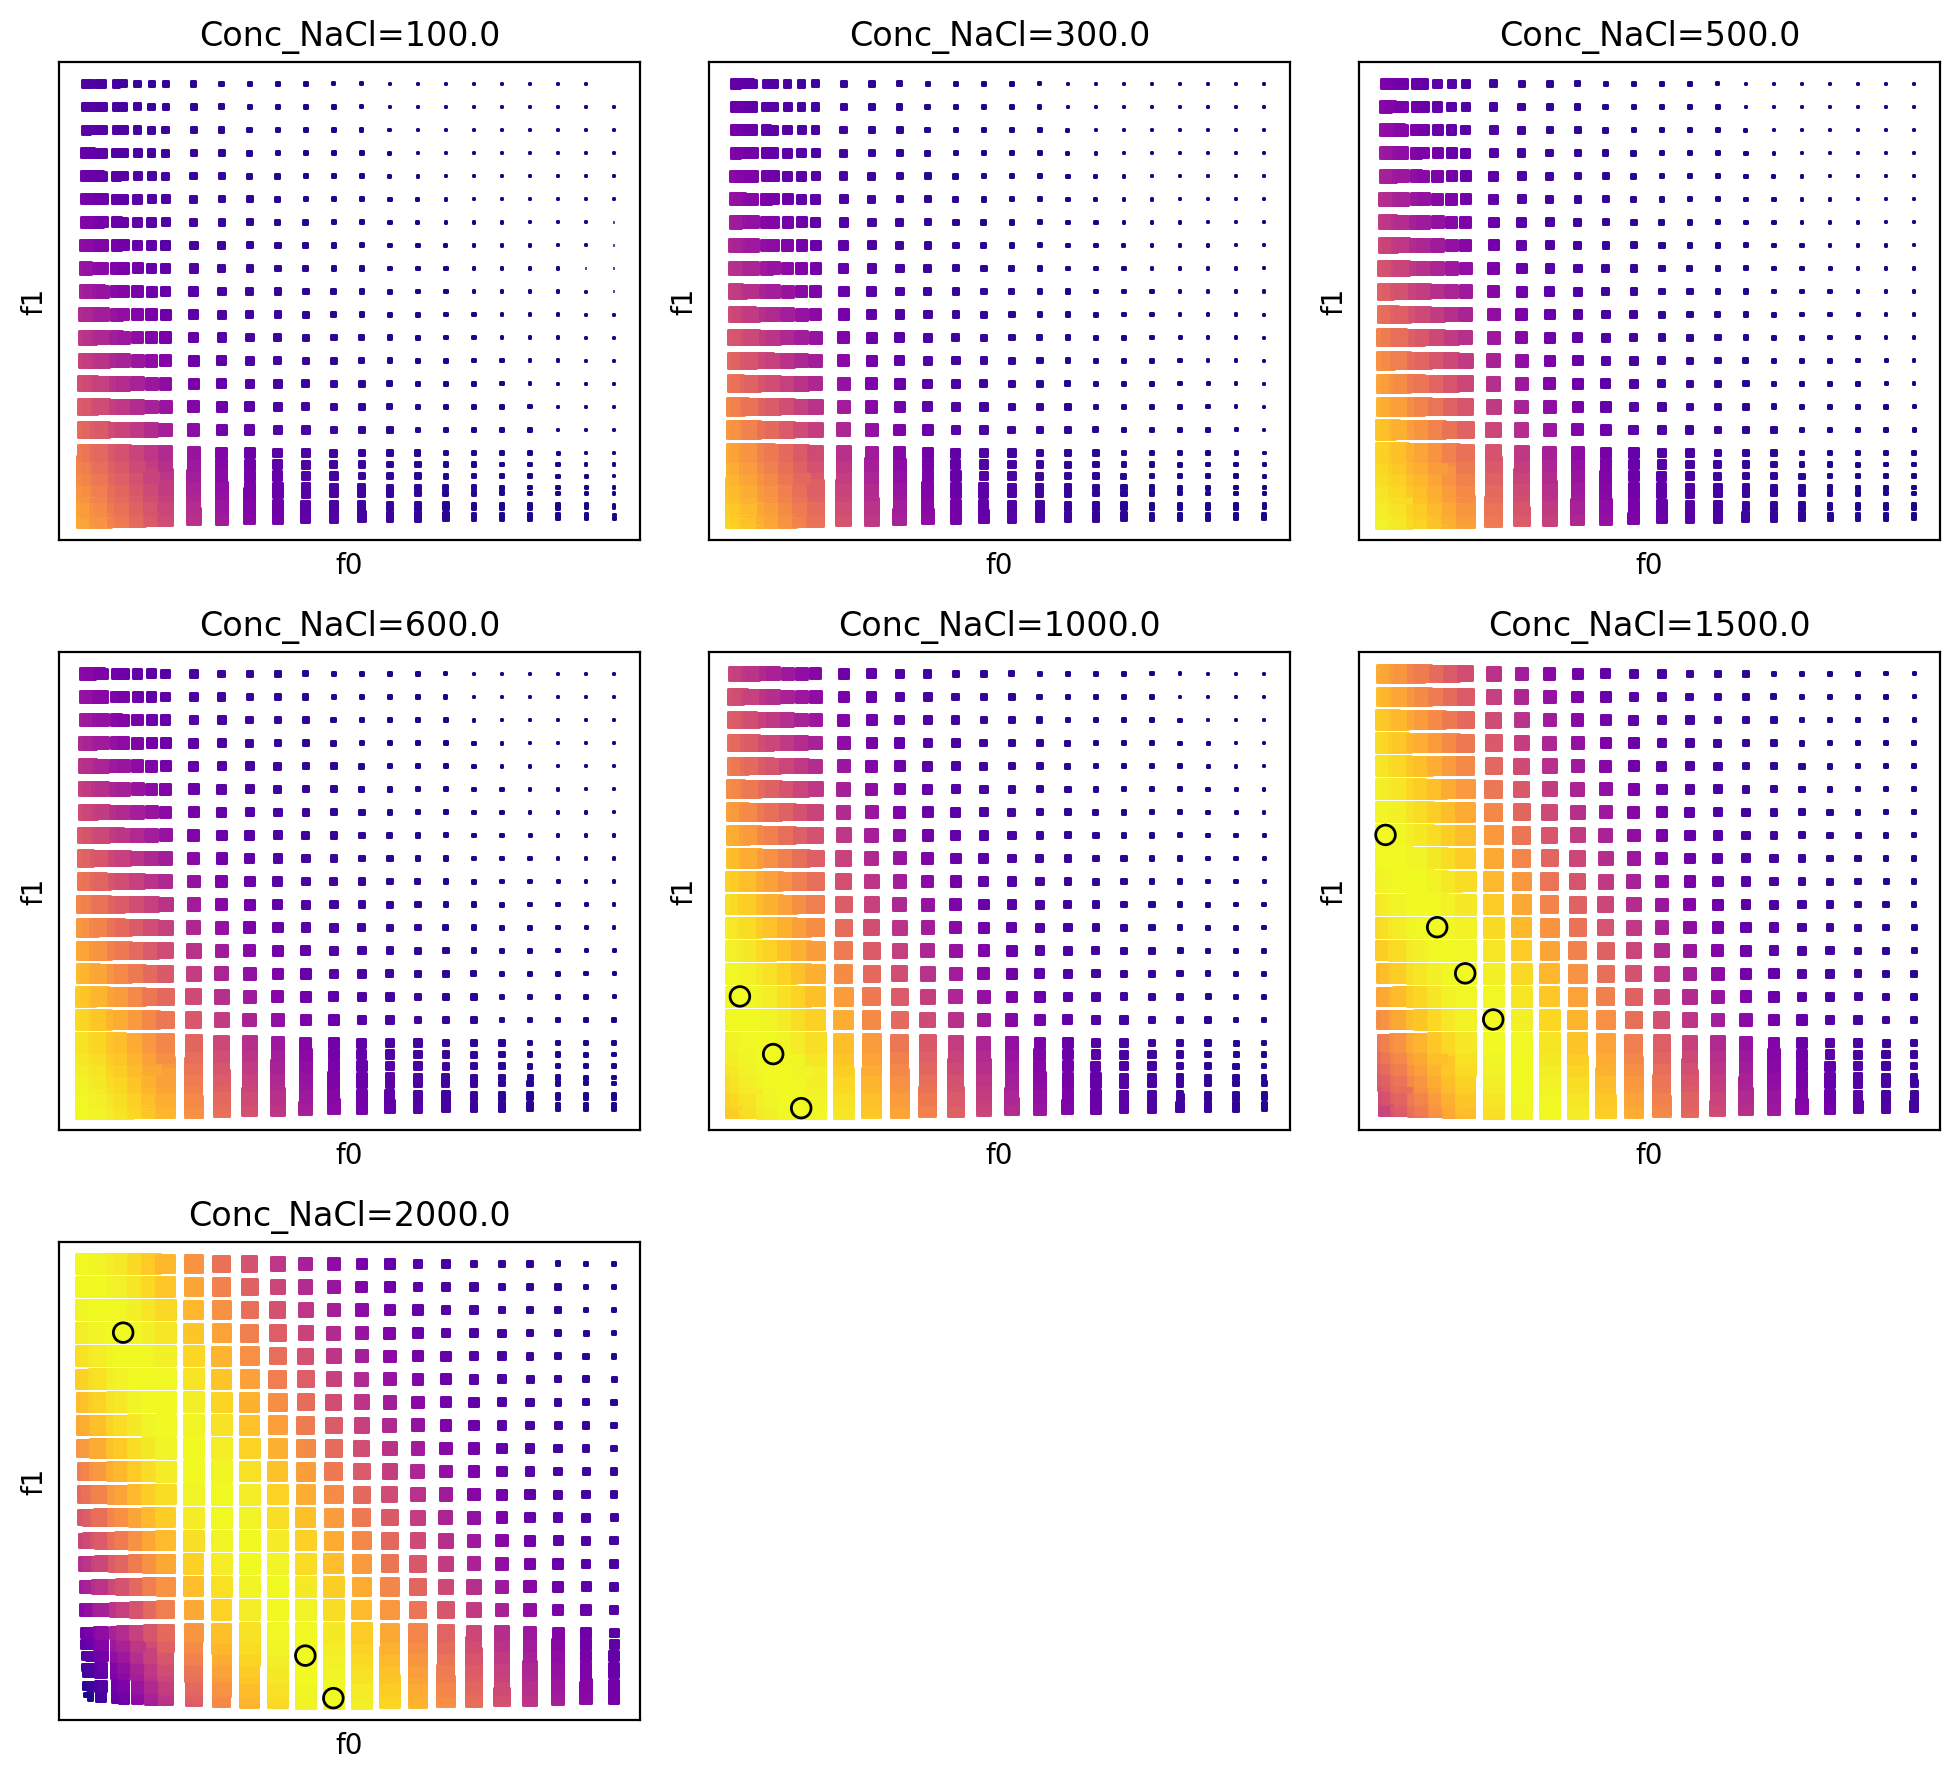

In [34]:
fig, ax = get_axes(len(valorigami),3)

for i,val in enumerate(valorigami):

    val_mask = [i for i,v in enumerate(X[forigami].values) if v == val]
    choosen_pts = [p for p in val_mask if p in new_idxs_fps]
        
    if len(choosen_pts) > 0:
        ax[i].scatter(X0.iloc[choosen_pts], X1.iloc[choosen_pts], 
                    edgecolor='0.', facecolor='none', 
                    s=50, zorder=3)

    for c in range(2):
        # alphas = get_alphas(Z=Z[val_mask, c], scale=True)
        # sizes = (Z[val_mask, c] * (H[val_mask]  - max(H)) * -1) + 0.005

        ax[i].scatter(X0.iloc[val_mask], X1.iloc[val_mask], 
                    c=H[val_mask], cmap='plasma',
                    # alpha=alphas,
                    vmin=min(H), vmax=max(H),
                    s=H[val_mask]*70, #Z[val_mask, c]*15, 
                    marker='s')
        
        ax[i].set_title(f'{forigami}={val}')

    ax[i].set_xlabel('f0')
    ax[i].set_ylabel('f1')
    ax[i].set_xticks(())
    ax[i].set_yticks(())

fig.tight_layout()

## Gboost

In [35]:
from classification import ClassifierModel

# define the classifier model
clf_model = 'GBoost'

# specific parameters
clf_dict = dict(
    random_state=73
)

al_clf = ClassifierModel(model=clf_model)

In [36]:
new_idxs_fps = active_learning_cycle(
    feature_space=(X, y),               # starting training feature space (points, classes)
    idxs=start_idxs,                    # starting indexes
    new_batch=n_batch,                  # number of points in outcome
    clfModel=al_clf,                    # initialised classifier
    acquisitionFunc=ac_func,            # aquisition mode
    screeningSelection=sampling_mode    # sampling methods for the points acquisition
    )
new_idxs_fps

Found 114 points that shares the same acquisition criteria.
Selecting 10 by 'FPS' sampling.


[2139, 4254, 3191, 1129, 3694, 2684, 1608, 2821, 3554, 1814]

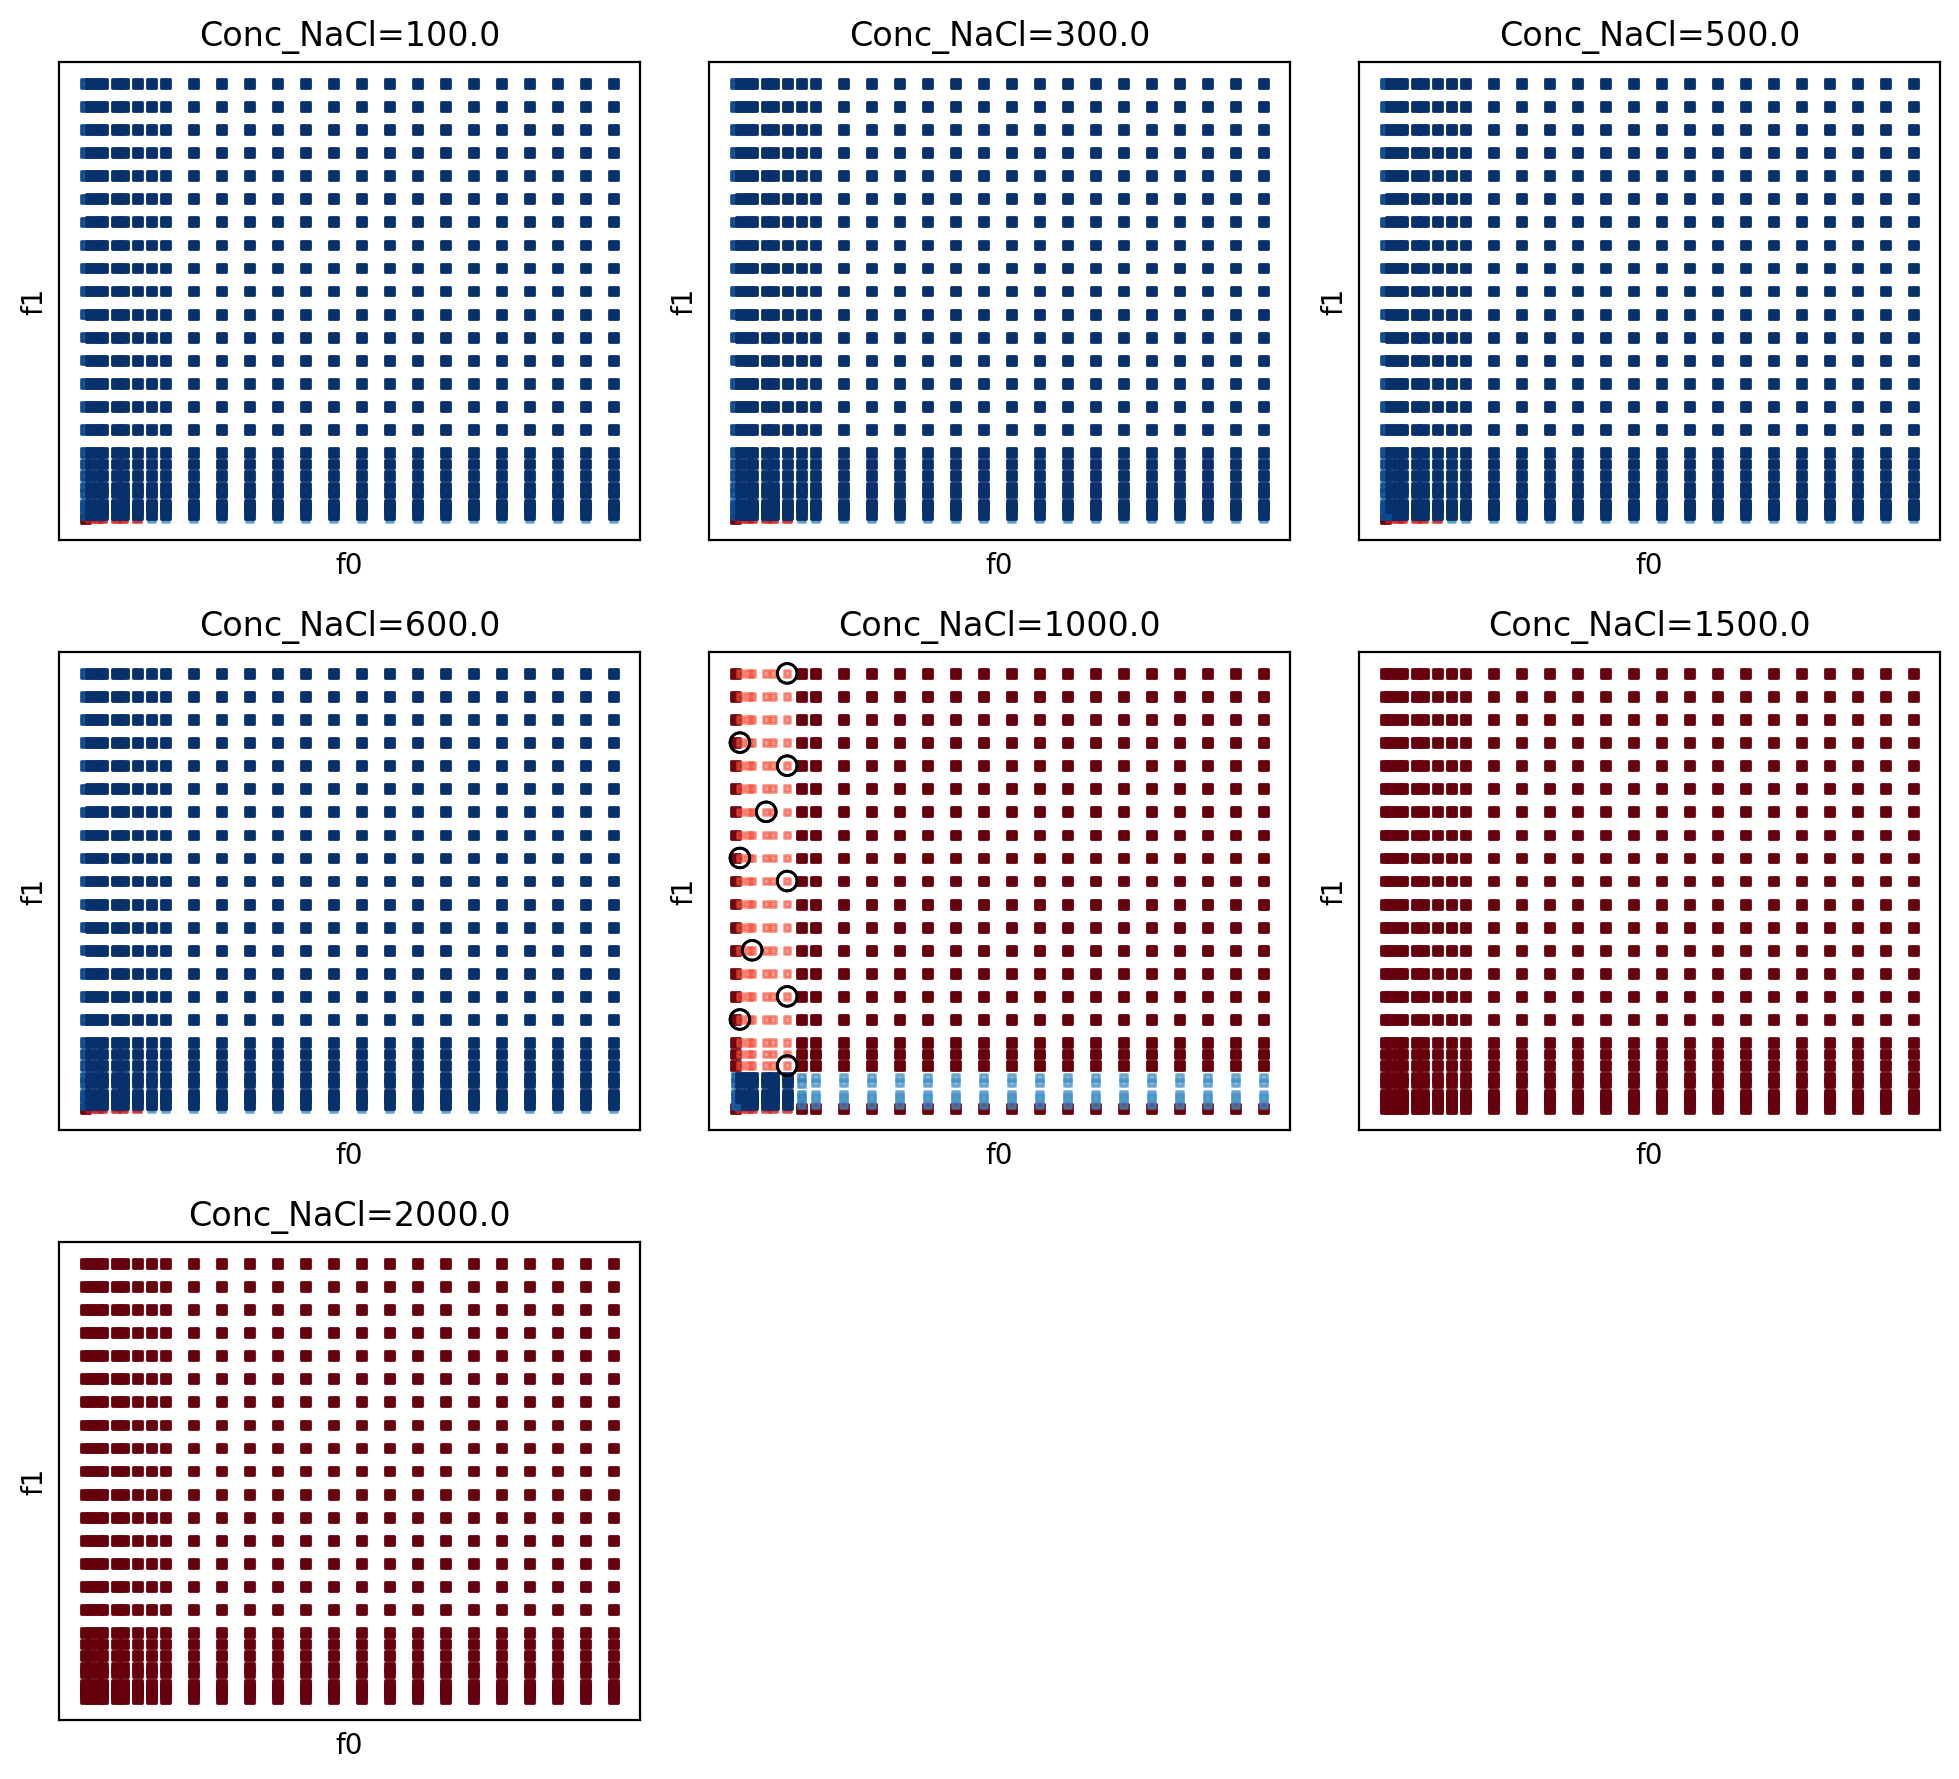

In [37]:
cmap_list = ['Reds', 'Blues', 'Greens']
_Z = al_clf.predict_proba(X=X)
Z = MinMaxScaler().fit_transform(_Z)
H = scipy.stats.entropy(pk=Z, axis=1)

fig, ax = get_axes(len(valorigami),3)

for c in range(2):
    alphas = get_alphas(Z=Z[:, c], scale=True)

    for i,val in enumerate(valorigami):

        val_mask = [j for j,v in enumerate(X[forigami].values) if v == val]
        # sizes = (Z[val_mask, c] * (H[val_mask]  - max(H)) * -1) + 0.005

        ax[i].scatter(X0.iloc[val_mask], X1.iloc[val_mask], 
                    c=Z[val_mask, c], cmap=cmap_list[c],
                    vmin=0., vmax=1.,
                    alpha=alphas[val_mask],
                    s=Z[val_mask, c]*10, 
                    marker='s')
            
        choosen_pts = [p for p in val_mask if p in new_idxs_fps]
            
        if len(choosen_pts) > 0:
            ax[i].scatter(X0.iloc[choosen_pts], X1.iloc[choosen_pts], 
                        edgecolor='0.', facecolor='none', 
                        s=50, zorder=3)
                

        ax[i].set_title(f'{forigami}={val}')

        ax[i].set_xlabel('f0')
        ax[i].set_ylabel('f1')
        ax[i].set_xticks(())
        ax[i].set_yticks(())

fig.tight_layout()

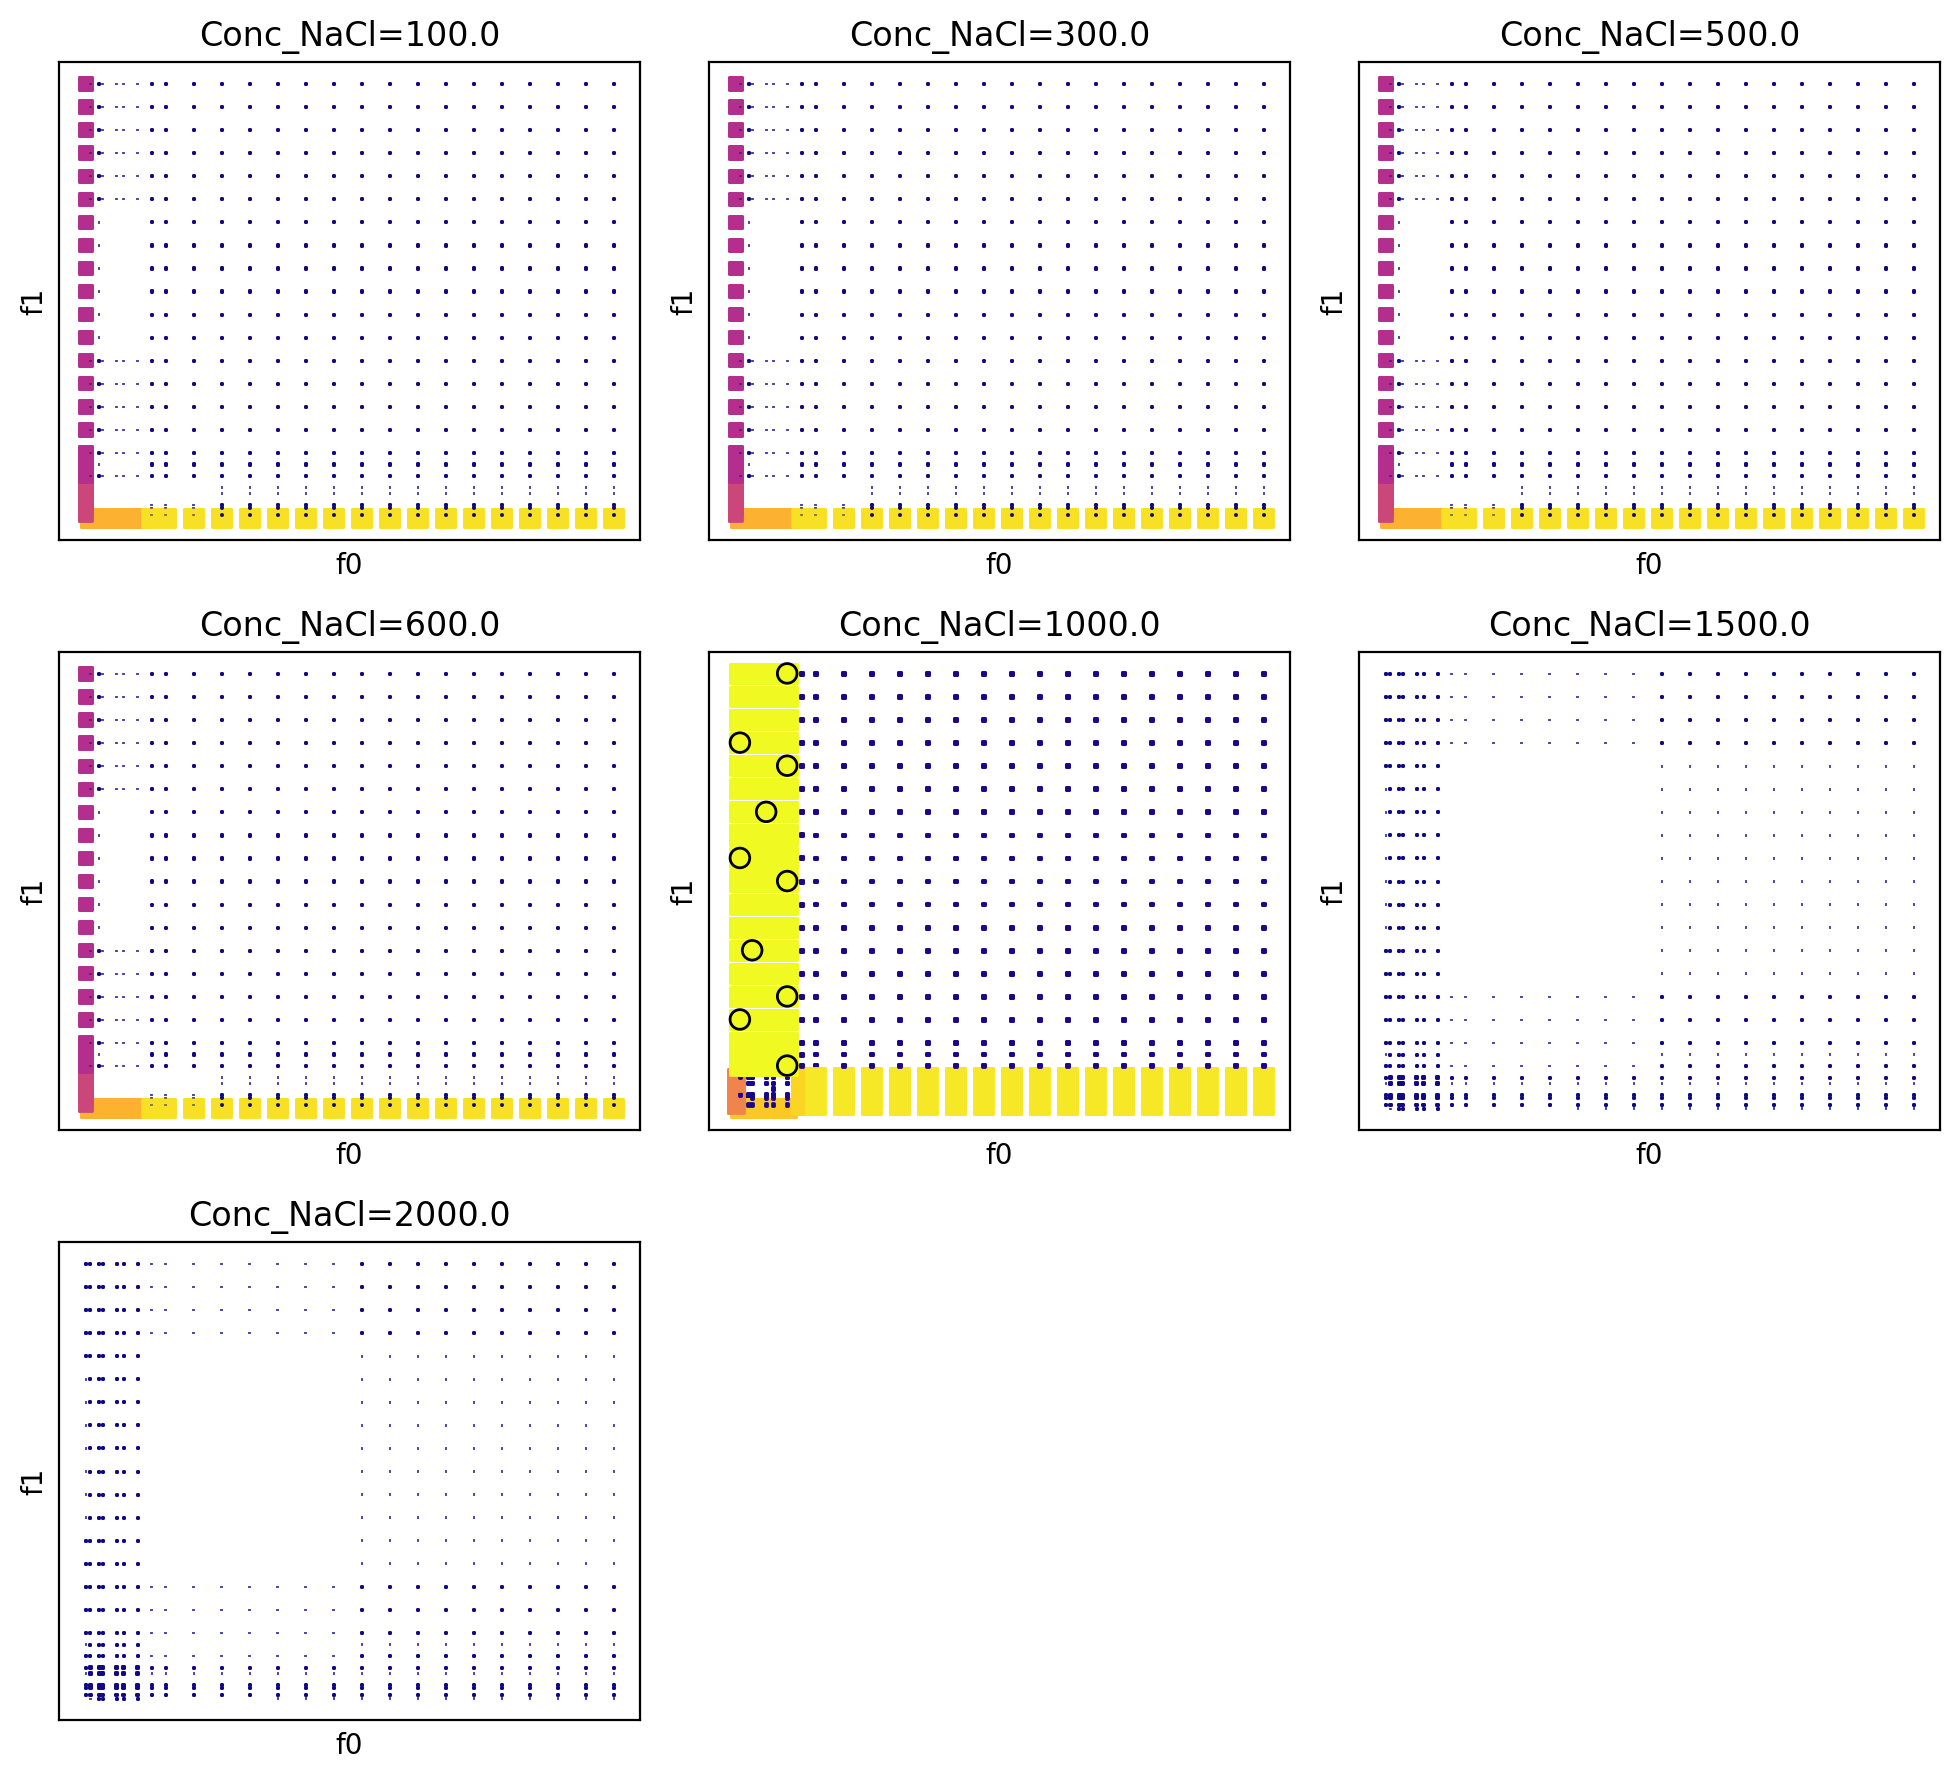

In [38]:
fig, ax = get_axes(len(valorigami),3)

for i,val in enumerate(valorigami):

    val_mask = [i for i,v in enumerate(X[forigami].values) if v == val]
    choosen_pts = [p for p in val_mask if p in new_idxs_fps]
        
    if len(choosen_pts) > 0:
        ax[i].scatter(X0.iloc[choosen_pts], X1.iloc[choosen_pts], 
                    edgecolor='0.', facecolor='none', 
                    s=50, zorder=3)

    for c in range(2):
        # alphas = get_alphas(Z=Z[val_mask, c], scale=True)
        # sizes = (Z[val_mask, c] * (H[val_mask]  - max(H)) * -1) + 0.005

        ax[i].scatter(X0.iloc[val_mask], X1.iloc[val_mask], 
                    c=H[val_mask], cmap='plasma',
                    # alpha=alphas,
                    vmin=min(H), vmax=max(H),
                    s=H[val_mask]*70, #Z[val_mask, c]*15, 
                    marker='s')
        
        ax[i].set_title(f'{forigami}={val}')

    ax[i].set_xlabel('f0')
    ax[i].set_ylabel('f1')
    ax[i].set_xticks(())
    ax[i].set_yticks(())

fig.tight_layout()